<a href="https://colab.research.google.com/github/chloeczerwinski/Portfolio/blob/main/Czerwinski_Chloe_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test for Manufacturing Business and Supplier Choices

## Chloe Czerwinski

### Overview

`Actions in python: merge, group, summarize, visualize, and find patterns in data.`

"The overall objective of this test is to JOIN data from multiple files in order to explore and find interesting patterns between the machine operating conditions and supplier information. You will report your findings within this notebook by displaying Pandas DataFrames and statistical visualizations via Seaborn and matplotlib when necessary."

## Import modules

You are permitted to use the following modules on this exam.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

You may also use the following sub module from SCIPY.

In [ ]:
from scipy.cluster import hierarchy

## Problem 01

The file names for the 3 machine data sets are provided as strings in the cell below. You are required to read in the CSV files and assign the data to the `m01_df`, `m02_df`, and `m03_df` objects. The data from machine 1 will therefore be associated with `m01_df`, machine 2 is associated with `m02_df`, and machine 3 is associated with `m03_df`.  

In this problem you must explore each of the three machine data sets.

You must perform the following **ESSENTIAL** activities:

* How many rows and columns are in each data set?
* What are the names and data types for each column?
* How many unique values are there for each column?
* How many missing values are there for each column?

You must visually explore the MARGINAL behavior of the variables in the data. You must use visualizations appropriate for the DATA TYPE of the columns.

You must visually explore RELATIONSHIPS between variables in the data. You must use visualizations appropriate for the DATA TYPES. You must make sure that your visualizations can answer the following questions:

* How many unique values for `Batch` are associated with each MACHINE (data set)?
* How many cell phone cases are associated with each `Batch` value for each MACHINE (data set)?
* Do the summary statistics of the OPERATING VARIABLES `x1` through `x4` vary across the three MACHINES?
* Do the summary statistics of the OPERATING VARIABLES `x1` through `x4` vary across the `Batch` values?
* Do the relationships between the OPERATING VARIABLES `x1` through `x4` vary across the three MACHINES?
* Do the relationships between the OPERATING VARIABLES `x1` through `x4` vary across the `Batch` values?

At the conclusion of this problem, you **MUST** CONCATENATE the 3 MACHINE data sets into a single DataFrame. The single DataFrame must be named `machine_df`. Before concatenating, you **MUST** add a column `machine_id` to each DataFrame with the correct index value for that machine (1, 2, or 3). The concatenating DataFrame variable name is provided as a reminder to you below.

You may add as many markdown and code cells as you see fit to answer this question. Include markdown cells stating what you see in the figures and why you selected to use them.

#### SOLUTION

In [ ]:
# Define the files's for the 3 machine level CSV files

file_m01 = 'midterm_machine_01.csv'

file_m02 = 'midterm_machine_02.csv'

file_m03 = 'midterm_machine_03.csv'

In [ ]:
# read in the CSV files and name them accordingly

m01_df = pd.read_csv(file_m01)

m02_df = pd.read_csv(file_m02)

m03_df = pd.read_csv(file_m03)

In [ ]:
# Names and data types of columns

m01_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5152 non-null   object 
 1   Batch   5152 non-null   int64  
 2   s_id    5152 non-null   int64  
 3   x1      5152 non-null   float64
 4   x2      5152 non-null   float64
 5   x3      5152 non-null   float64
 6   x4      5152 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 281.9+ KB


In [ ]:
# There are 5,152 rows and 7 columns

m01_df.shape

(5152, 7)

In [ ]:
# Unique values in each column includes NaN values
# (50 unique values in Batch, 149 in s_id, 5,152 in columns ID, x1, x2, x3, and x4.)

m01_df.nunique(dropna=False)

ID       5152
Batch      50
s_id      149
x1       5152
x2       5152
x3       5152
x4       5152
dtype: int64

In [ ]:
# Counts the number of missing values- 0 missing values

m01_df.isna().sum()

ID       0
Batch    0
s_id     0
x1       0
x2       0
x3       0
x4       0
dtype: int64

In [ ]:
# 50 unique values in machine 1

m01_df['Batch'].nunique()

50

In [ ]:
# Names and data types of columns

m02_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5119 entries, 0 to 5118
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5119 non-null   object 
 1   Batch   5119 non-null   int64  
 2   s_id    5119 non-null   int64  
 3   x1      5119 non-null   float64
 4   x2      5119 non-null   float64
 5   x3      5119 non-null   float64
 6   x4      5119 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 280.1+ KB


In [ ]:
# There are 5,119 rows and 7 columns

m02_df.shape

(5119, 7)

In [ ]:
# Number of unique values in each column includes NaN

m02_df.nunique(dropna=False)

ID       5119
Batch      50
s_id      133
x1       5119
x2       5119
x3       5119
x4       5119
dtype: int64

In [ ]:
# Counts number of missing values- 0 missing values

m02_df.isna().sum()

ID       0
Batch    0
s_id     0
x1       0
x2       0
x3       0
x4       0
dtype: int64

In [ ]:
# 50 unique values for Batch in machine 2

m02_df['Batch'].nunique()

50

In [ ]:
# Numbers missing: None

m02_df['Batch'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [ ]:
# Names and data types for columns

m03_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4458 entries, 0 to 4457
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      4458 non-null   object 
 1   Batch   4458 non-null   int64  
 2   s_id    4458 non-null   int64  
 3   x1      4458 non-null   float64
 4   x2      4458 non-null   float64
 5   x3      4458 non-null   float64
 6   x4      4458 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 243.9+ KB


In [ ]:
#There are 4,458 rows and 7 columns

m03_df.shape

(4458, 7)

In [ ]:
# Number of unique values includes NaN

m03_df.nunique(dropna=False)

ID       4458
Batch      41
s_id      141
x1       4458
x2       4458
x3       4458
x4       4458
dtype: int64

In [ ]:
# Numbers missing: 7, 8, 10, 11, 18, 25, 30, & 39

m03_df['Batch'].unique()

array([ 1,  2,  3,  4,  5,  6,  9, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22,
       23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42,
       43, 44, 45, 46, 47, 48, 49])

In [ ]:
# Counts number of missing values- 0 missing values

m03_df.isna().sum()

ID       0
Batch    0
s_id     0
x1       0
x2       0
x3       0
x4       0
dtype: int64

In [ ]:
m03_df.s_id.value_counts()

s_id
1      41
42     41
30     41
31     41
33     41
       ..
137     3
138     3
139     3
140     3
141     2
Name: count, Length: 141, dtype: int64

In [ ]:
# 41 unique values of Batch in machine 3

m03_df['Batch'].nunique()

41

## Visually explore the marginal behavior of the variables in the data

First let's explore a brief glance at histograms for each machine, ignoring the batch and s_id variables since they are categorical and the histogram for them is not useful here.

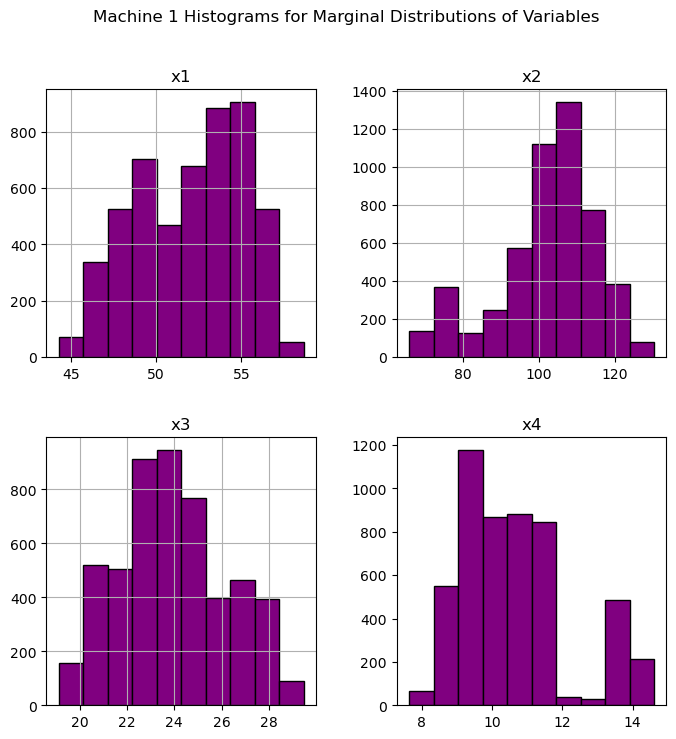

In [ ]:
## Machine 1 histogram for variables marginal distributions at a glance

m01_df[['x1','x2','x3','x4']].hist(figsize=(8,8), bins=10, color='purple', edgecolor='black')

plt.suptitle('Machine 1 Histograms for Marginal Distributions of Variables')
plt.grid(False)
plt.show()

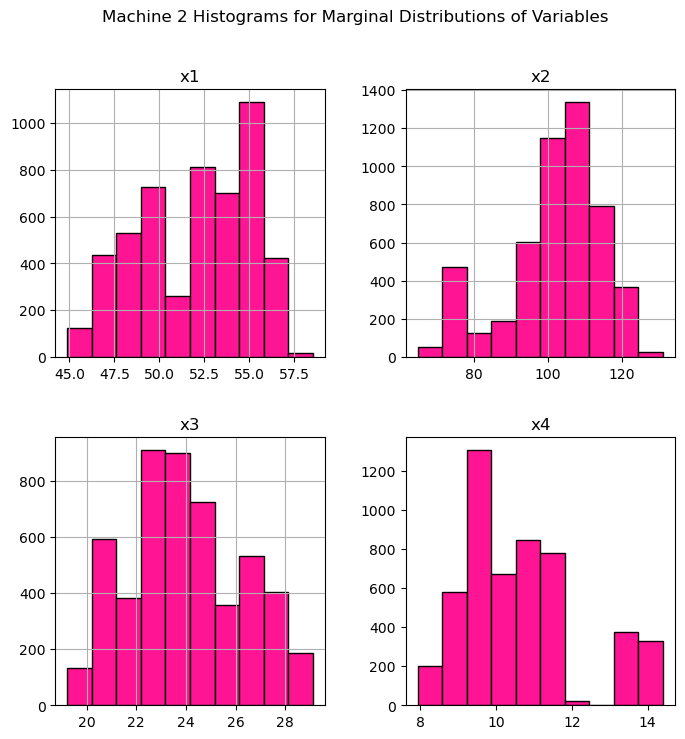

In [ ]:
## Machine 2 histogram for variables marginal distributions at a glance

m02_df[['x1','x2','x3','x4']].hist(figsize=(8,8), bins=10, color='deeppink', edgecolor='black')

plt.suptitle('Machine 2 Histograms for Marginal Distributions of Variables')
plt.grid(False)
plt.show()

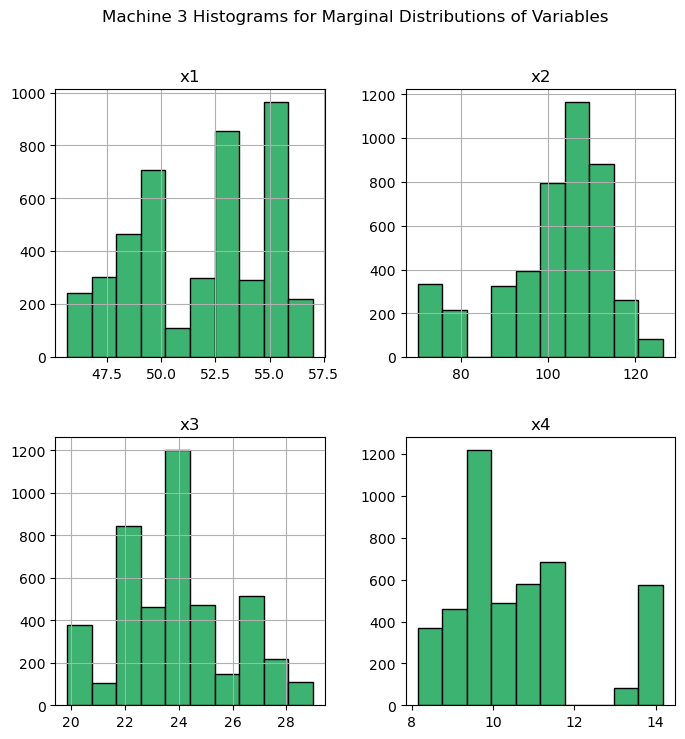

In [ ]:
## Machine 3 histogram for variables marginal distributions at a glance

m03_df[['x1','x2','x3','x4']].hist(figsize=(8,8), bins=10, color='mediumseagreen', edgecolor='black')

plt.suptitle('Machine 3 Histograms for Marginal Distributions of Variables')
plt.grid(False)
plt.show()

#### For the continuous variables x1, x2, x3, and x4, the x and y numbers are similar. The distributions for the variables in each is fairly similar. For example, x4 on each machine is has the highest count at 9. x3 on all machines has the highest count at 24. x2 has the highest distribution between values close to 100-115. x1 has the highest count at around 55 on all machines.

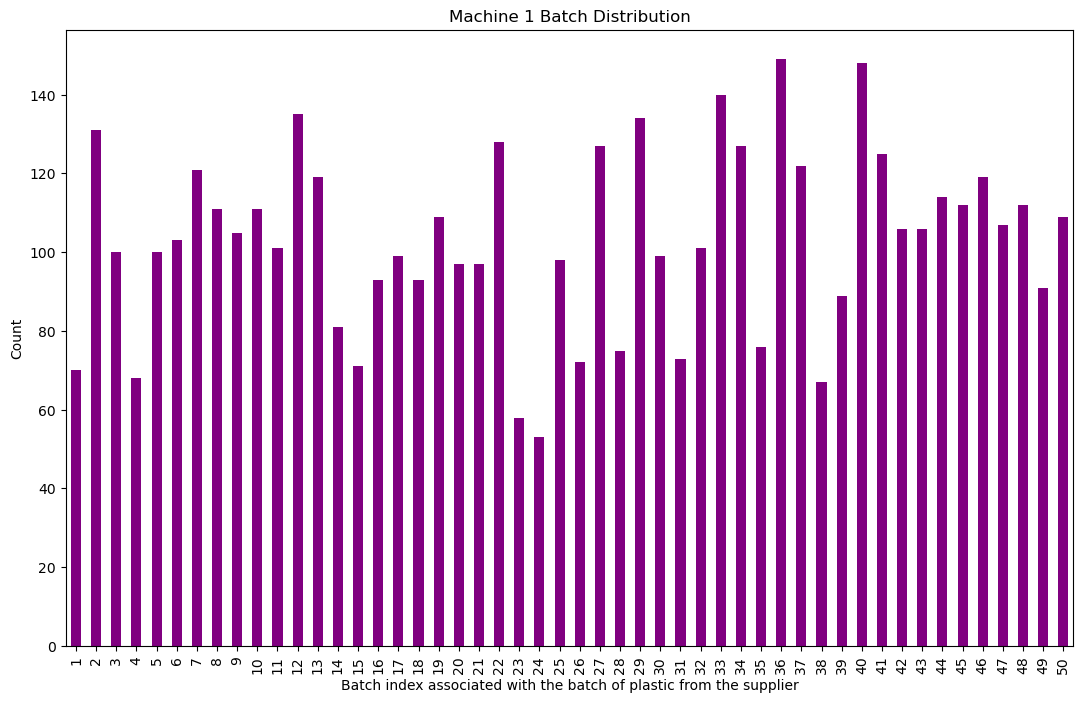

In [ ]:
fig, ax= plt.subplots(figsize=(13,8))

m01_df.Batch.value_counts().sort_index().plot(kind='bar',
                                                    ax=ax,
                                                    color='purple')
plt.title('Machine 1 Batch Distribution')
plt.xlabel('Batch index associated with the batch of plastic from the supplier')
plt.ylabel('Count')
plt.show()

#### The chart shows how many cell phone cases are associated with each Batch for Machine 1. Later we will explore which batches belong to either Supplier 1 or 2.


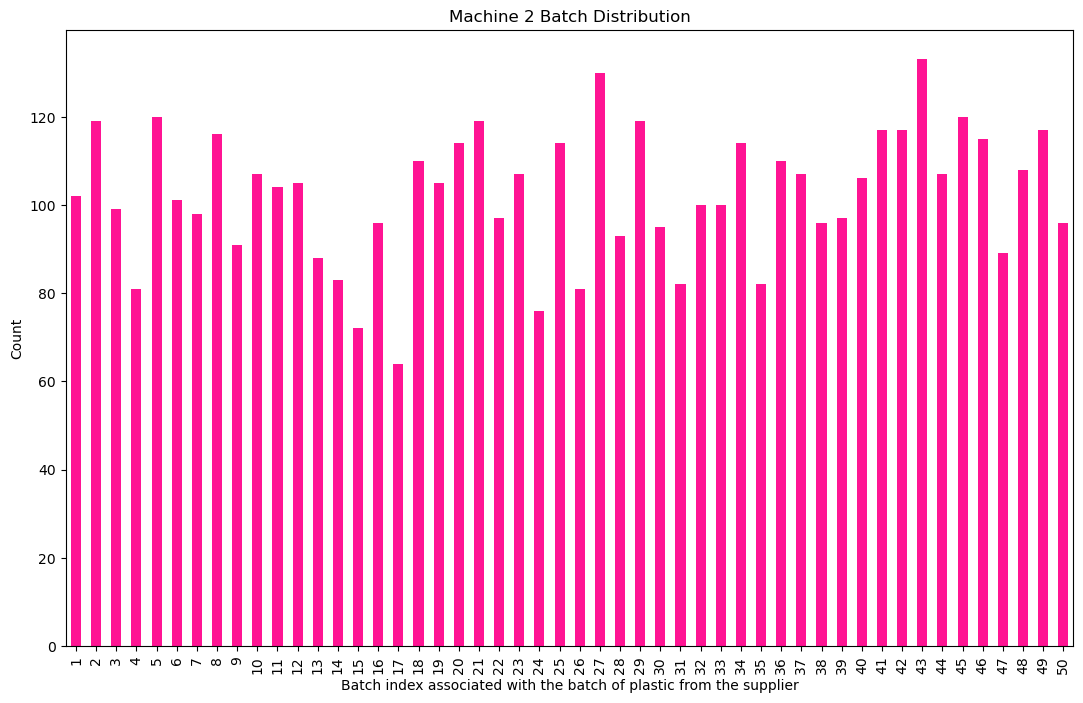

In [ ]:
fig, ax= plt.subplots(figsize=(13,8))

m02_df.Batch.value_counts().sort_index().plot(kind='bar',
                                                    ax=ax,
                                                    color='deeppink')
plt.title('Machine 2 Batch Distribution')
plt.xlabel('Batch index associated with the batch of plastic from the supplier')
plt.ylabel('Count')
plt.show()

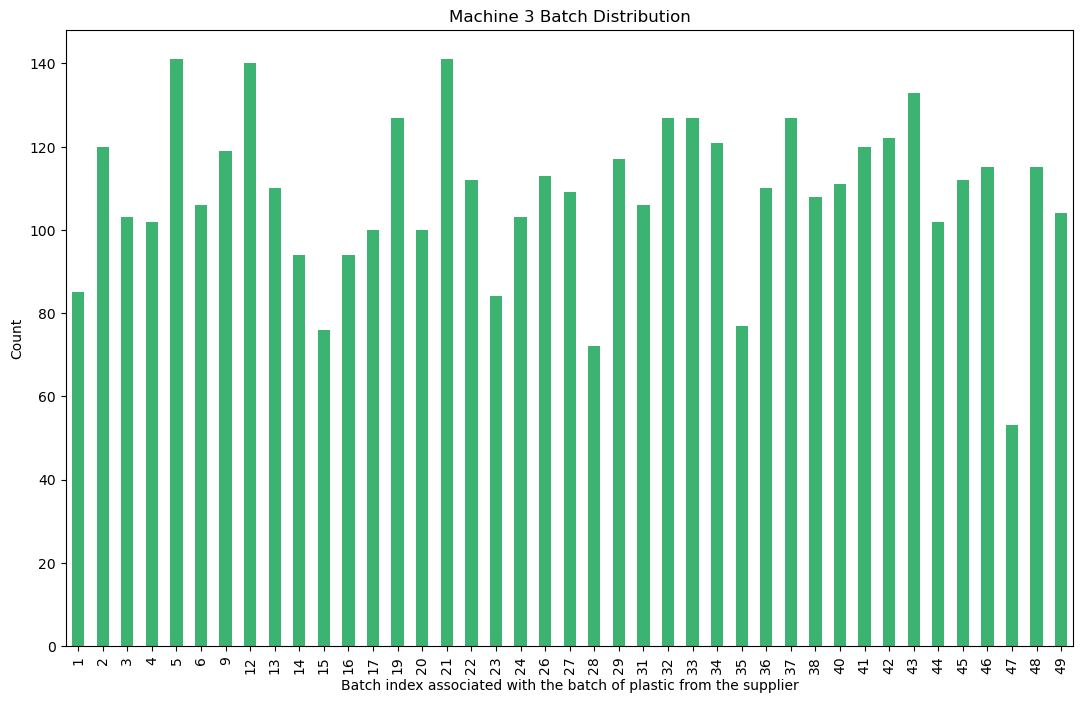

In [ ]:
fig, ax= plt.subplots(figsize=(13,8))

m03_df.Batch.value_counts().sort_index().plot(kind='bar',
                                                    ax=ax,
                                                    color='mediumseagreen')
plt.title('Machine 3 Batch Distribution')
plt.xlabel('Batch index associated with the batch of plastic from the supplier')
plt.ylabel('Count')
plt.show()

#### The Batches are showing us how many potentially identical products are grouped together by the same manufacturing practices. Let's find out more information.

First, check the summary statistics of the operating variables by each machine. I need to see these numbers in a table before visualizing them.

In [ ]:
m01_df.describe()

Batch         s_id           x1           x2           x3  \
count  5152.000000  5152.000000  5152.000000  5152.000000  5152.000000   
mean     26.047748    54.540373    51.998218   102.207011    23.947216   
std      14.560368    33.650665     3.151912    12.888171     2.269325   
min       1.000000     1.000000    44.275379    65.810729    19.095832   
25%      13.000000    26.000000    49.335776    96.610288    22.334048   
50%      27.000000    52.000000    52.536206   104.487824    23.855690   
75%      39.000000    80.000000    54.662490   110.609442    25.448356   
max      50.000000   149.000000    58.647186   130.228828    29.477213   

                x4  
count  5152.000000  
mean     10.628436  
std       1.542291  
min       7.644190  
25%       9.479969  
50%      10.356002  
75%      11.318120  
max      14.612911

In [ ]:
m02_df.describe()

Batch         s_id           x1           x2           x3  \
count  5119.000000  5119.000000  5119.000000  5119.000000  5119.000000   
mean     25.929674    52.754444    51.989377   101.998905    23.982312   
std      14.595274    31.263876     3.095129    12.834348     2.275809   
min       1.000000     1.000000    44.896759    64.774007    19.232164   
25%      13.000000    26.000000    49.240567    96.325502    22.372944   
50%      26.000000    52.000000    52.610949   104.357308    23.894465   
75%      39.000000    78.000000    54.785418   110.672960    25.546656   
max      50.000000   133.000000    58.503441   131.009046    29.093229   

                x4  
count  5119.000000  
mean     10.605275  
std       1.523140  
min       7.934064  
25%       9.492226  
50%      10.329911  
75%      11.286062  
max      14.400437

In [ ]:
m03_df.describe()

Batch         s_id           x1           x2           x3  \
count  4458.00000  4458.000000  4458.000000  4458.000000  4458.000000   
mean     26.24428    56.475774    51.857672   101.650057    23.927679   
std      14.28990    33.827427     3.022646    12.243012     2.035196   
min       1.00000     1.000000    45.690397    70.192150    19.865338   
25%      14.00000    28.000000    49.228020    95.381831    22.457249   
50%      27.00000    55.000000    52.598712   104.712727    23.900193   
75%      38.00000    83.000000    54.810528   110.050211    25.142293   
max      49.00000   141.000000    56.981029   126.332105    28.972747   

                x4  
count  4458.000000  
mean     10.602371  
std       1.554708  
min       8.155668  
25%       9.475467  
50%      10.351781  
75%      11.301126  
max      14.182623

* The operating variable's summary statistics vary slightly across the machines but are similar.

In [ ]:
m01_df.groupby('Batch')[['x1', 'x2', 'x3', 'x4']].mean()

x1          x2         x3         x4
Batch                                             
1      49.621843  103.484910  22.329830  13.729102
2      52.642090  100.440735  20.577667  11.107746
3      46.884192   75.333474  26.664203   9.331353
4      49.143201   92.600506  22.632570  10.579468
5      52.826454  106.882793  24.162622   9.539904
6      55.069060  110.669941  25.144766   8.648357
7      55.374424  119.595283  28.058317   9.845938
8      55.683529  110.731560  23.972398  11.399441
9      49.720430  103.849253  22.253826  13.725972
10     52.728459   99.720656  20.581113  11.129418
11     46.965342   74.863776  26.555374   9.407536
12     48.920600   92.731548  22.779159  10.503956
13     52.895158  106.196471  24.072000   9.544680
14     55.026840  111.076834  25.203846   8.696293
15     55.233030  119.939991  28.010818   9.865606
16     55.598039  111.850426  24.009323  11.355349
17     49.525081  104.113403  22.250145  13.743214
18     52.705293   99.943844  20.587107  11.118180
19     47.031291   74.791287  26.595244   9.387312
20     48.954850   92.890333  22.668610  10.523352
21     52.808718  106.513060  23.932071   9.598814
22     55.083776  110.790702  25.035622   8.772188
23     55.297634  119.509533  27.960932   9.898184
24     55.607959  111.760334  24.017654  11.413381
25     49.688009  103.690453  22.236421  13.755312
26     52.477206  100.262077  20.532892  11.095793
27     46.692739   75.723823  26.569854   9.409306
28     48.851986   93.284051  22.716887  10.527803
29     53.049047  106.027238  24.048943   9.591841
30     55.179873  109.834156  25.063902   8.719944
31     55.021998  120.153917  27.957427   9.852955
32     55.581914  111.768560  24.055011  11.342239
33     49.688397  104.089400  22.190997  13.775761
34     52.475358  100.581220  20.529441  11.145953
35     46.885557   75.936352  26.700304   9.382045
36     48.921922   93.074406  22.727941  10.504102
37     52.863281  106.260273  24.026170   9.559355
38     55.277001  110.050053  25.140525   8.702062
39     55.233024  119.345892  27.991437   9.870527
40     55.543389  111.326348  24.032127  11.352272
41     49.555554  104.614442  22.248229  13.737261
42     52.687039  100.248736  20.557806  11.117896
43     46.854666   75.567428  26.548081   9.420747
44     49.034609   92.397862  22.743693  10.522154
45     52.982897  106.870720  24.094102   9.544987
46     55.034662  110.640616  25.085763   8.730117
47     54.977703  120.732332  27.929967   9.915321
48     55.547328  111.227396  24.012484  11.394444
49     49.710942  104.303037  22.342929  13.727698
50     52.607080  100.418749  20.574681  11.114062

In [ ]:
m01_df.groupby('Batch')[['x1','x2','x3','x4']].corr()

x1        x2        x3        x4
Batch                                           
1     x1  1.000000 -0.799209 -0.120857 -0.022968
      x2 -0.799209  1.000000  0.157464  0.000275
      x3 -0.120857  0.157464  1.000000 -0.767872
      x4 -0.022968  0.000275 -0.767872  1.000000
2     x1  1.000000 -0.768966  0.069225 -0.076870
...            ...       ...       ...       ...
49    x4  0.159566 -0.257262 -0.808746  1.000000
50    x1  1.000000 -0.717987 -0.108621  0.091202
      x2 -0.717987  1.000000  0.076936 -0.070050
      x3 -0.108621  0.076936  1.000000 -0.719884
      x4  0.091202 -0.070050 -0.719884  1.000000

[200 rows x 4 columns]

In [ ]:
m02_df.groupby('Batch')[['x1','x2','x3','x4']].corr()

x1        x2        x3        x4
Batch                                           
1     x1  1.000000  0.163656 -0.217603 -0.001689
      x2  0.163656  1.000000 -0.142951 -0.069450
      x3 -0.217603 -0.142951  1.000000 -0.173068
      x4 -0.001689 -0.069450 -0.173068  1.000000
2     x1  1.000000  0.190067 -0.039772 -0.118070
...            ...       ...       ...       ...
49    x4  0.085552 -0.031279 -0.256291  1.000000
50    x1  1.000000  0.198618  0.074470 -0.037296
      x2  0.198618  1.000000  0.017599 -0.132803
      x3  0.074470  0.017599  1.000000 -0.040388
      x4 -0.037296 -0.132803 -0.040388  1.000000

[200 rows x 4 columns]

In [ ]:
m03_df.groupby('Batch')[['x1','x2','x3','x4']].corr()

x1        x2        x3        x4
Batch                                           
1     x1  1.000000  0.760277  0.127774 -0.027709
      x2  0.760277  1.000000  0.096853  0.016254
      x3  0.127774  0.096853  1.000000  0.744956
      x4 -0.027709  0.016254  0.744956  1.000000
2     x1  1.000000  0.685391 -0.004765  0.046219
...            ...       ...       ...       ...
48    x4  0.064493 -0.042554  0.764414  1.000000
49    x1  1.000000  0.792663 -0.032332 -0.095601
      x2  0.792663  1.000000 -0.031371 -0.091763
      x3 -0.032332 -0.031371  1.000000  0.745093
      x4 -0.095601 -0.091763  0.745093  1.000000

[164 rows x 4 columns]

### Unique Values Associated with each Machine

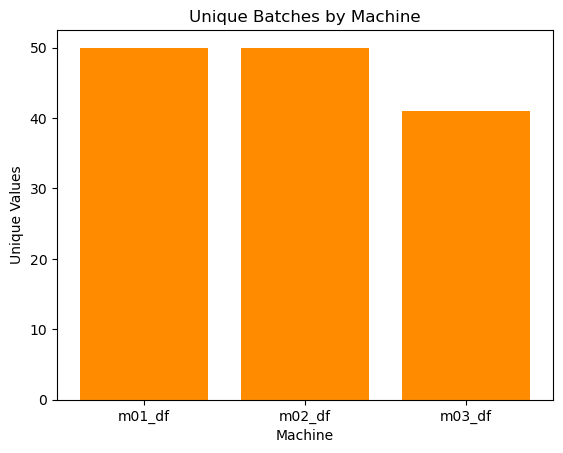

In [ ]:
# Unique values associated with each machine

plt.bar(['m01_df', 'm02_df', 'm03_df'], [m01_df['Batch'].nunique(), m02_df['Batch'].nunique(), m03_df['Batch'].nunique()],
        color= 'darkorange')

plt.title('Unique Batches by Machine')
plt.xlabel('Machine')
plt.ylabel('Unique Values')
plt.show()

In [ ]:
# Machines 1 and 2 have 50 unique batches, and Machine 3 has 41 unique values.

In [ ]:
m03_df['Batch'].nunique()

41

### Cell Phone Cases Assocated with each Batch Value for each Machine

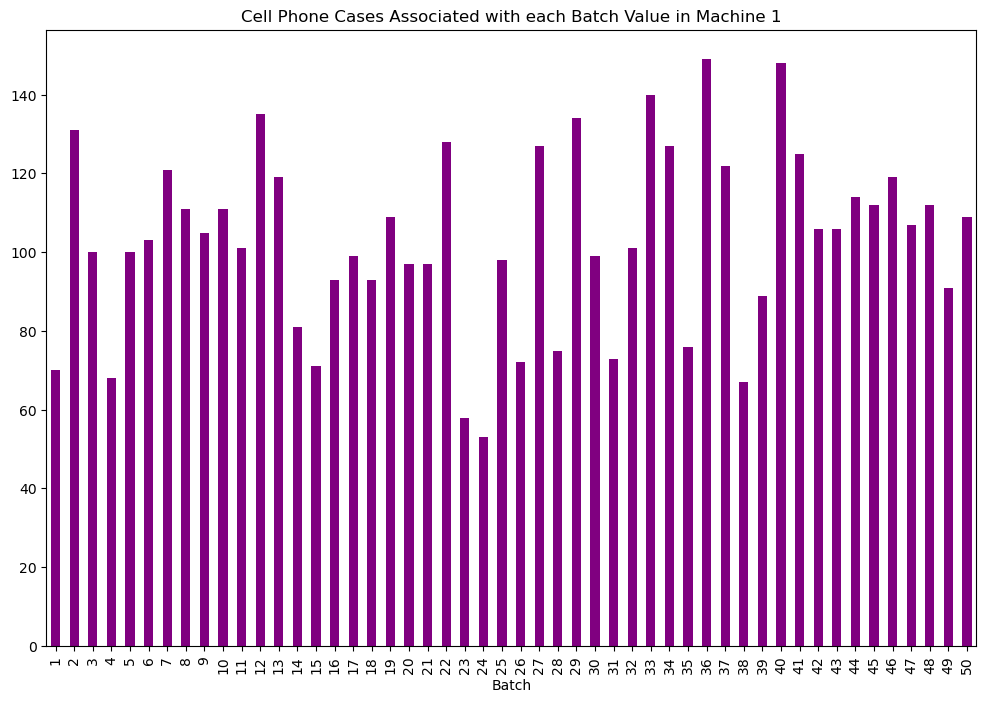

In [ ]:
# Cell phone cases associated with each Batch value in Machine 1

fig, ax=plt.subplots(figsize=(12, 8))

m01_df['Batch'].value_counts().sort_index().plot(kind='bar', color='purple', ax=ax)

plt.title('Cell Phone Cases Associated with each Batch Value in Machine 1')
plt.show()

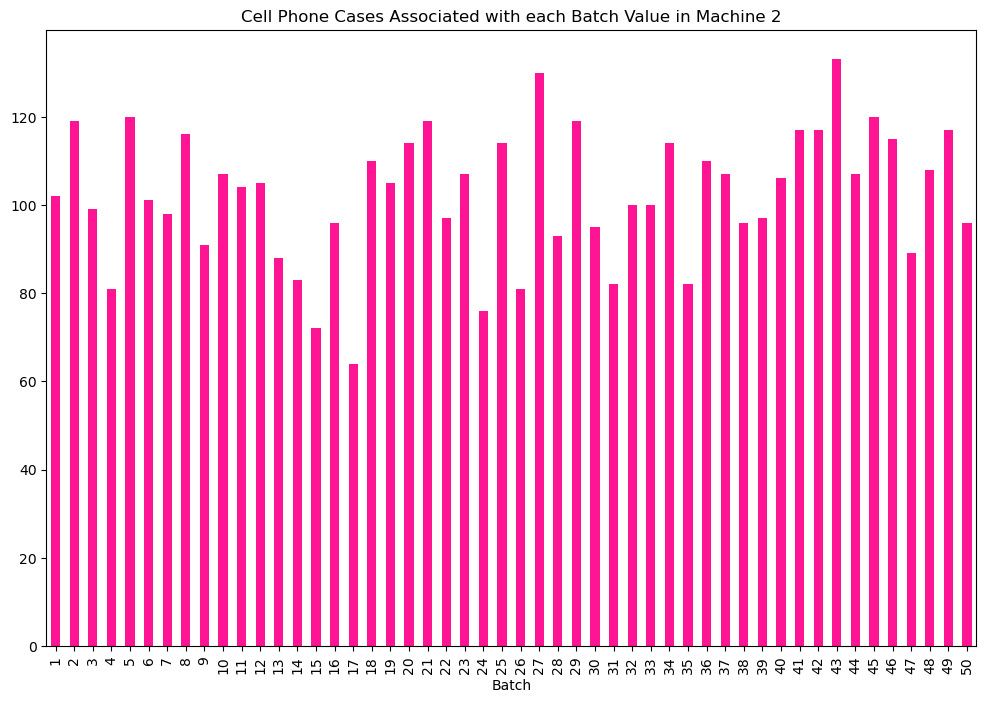

In [ ]:
# Cell phone cases associated with each Batch value in Machine 2

fig, ax=plt.subplots(figsize=(12, 8))

m02_df['Batch'].value_counts().sort_index().plot(kind='bar', color='deeppink', ax=ax)

plt.title('Cell Phone Cases Associated with each Batch Value in Machine 2')
plt.show()

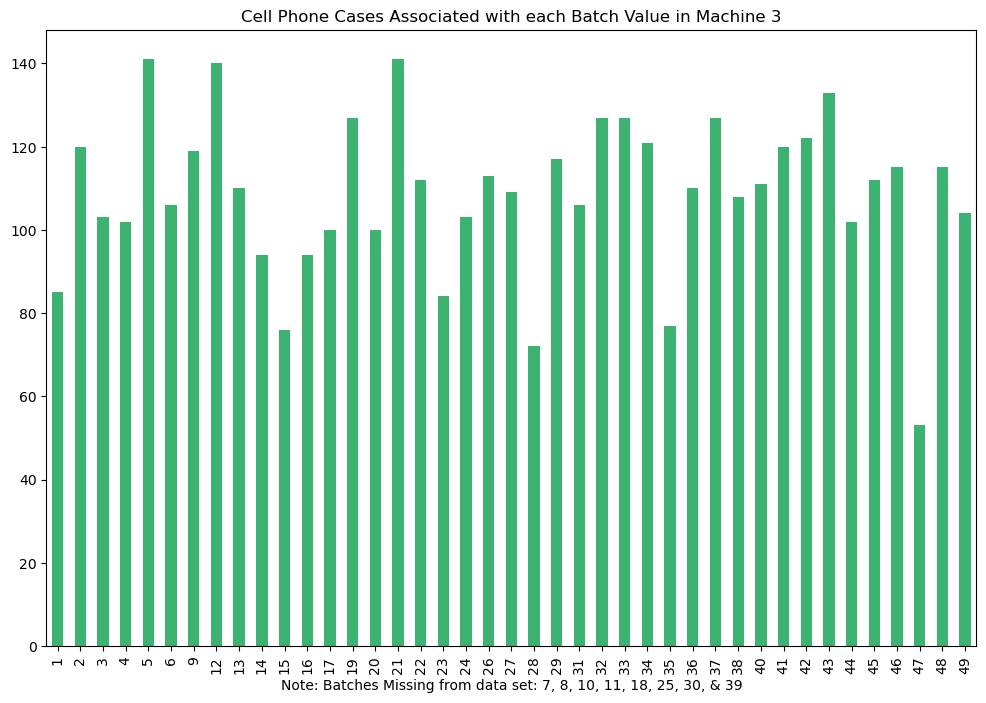

In [ ]:
# Cell phone cases associated with each Batch value in Machine 3

fig, ax=plt.subplots(figsize=(12, 8))

m03_df['Batch'].value_counts().sort_index().plot(kind='bar', color='mediumseagreen', ax=ax)

plt.title('Cell Phone Cases Associated with each Batch Value in Machine 3')
plt.xlabel('Note: Batches Missing from data set: 7, 8, 10, 11, 18, 25, 30, & 39')
plt.show()

In charts for machine 1 and 2 above, all 50 batches are shown on the graph for both. For machine 3, the chart shows 49 batches even though there are 41 unique values. This is because there are missing numbers from the chart: 7, 8, 10, 11, 18, 25, 30, & 39.

### Summary Statistic Variation of Operating Variables x1, x2, x3, and x4 across each Machine

Note: I am losing my mind trying to find why I have in my notebook (yes a physical notebook where I handwrite notes for class) plt.boxplot and I can't find the jupyter notebook for the lesson specifically on plt.boxplot. Now I am unsure if this is a code I looked up on Google Search and I'd like to not get in trouble, so I am going to note here that plt.boxplot is in my handwritten notes and since I can't find the jupyter notebook where we specifically had plt.boxplot, I'm going to source it as Google.... since I only found the sns.catplot/ kind='box' in my jupyter notebook.

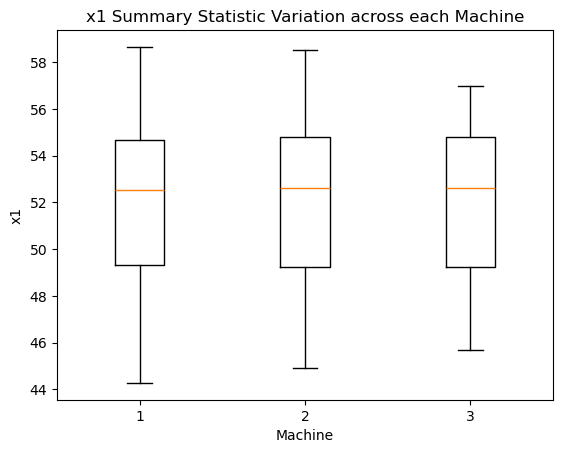

In [ ]:
# Boxplot for summary statistics of operating variable x1

plt.boxplot([m01_df['x1'], m02_df['x1'], m03_df['x1']])

plt.xlabel('Machine')
plt.ylabel('x1')
plt.title('x1 Summary Statistic Variation across each Machine')
plt.show()

The machines have very similar medians and have the same variability in 'measurement' for x1. Machine 1 has the most range of outliers, and Machine 3 has the least, which means Machine 3 is most consistent for x1.

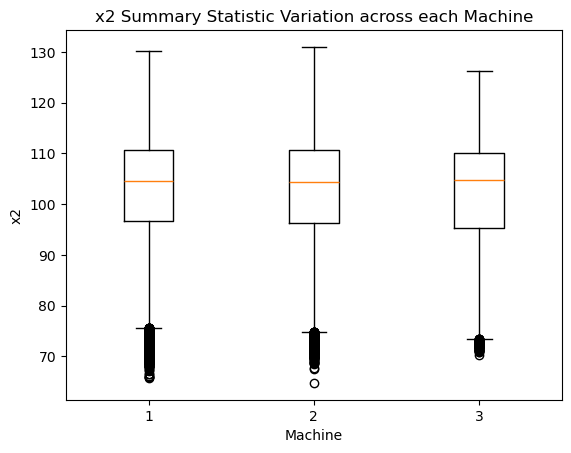

In [ ]:
# Boxplot for summary statistics of operating variable x2

plt.boxplot([m01_df['x2'], m02_df['x2'], m03_df['x2']])

plt.xlabel('Machine')
plt.ylabel('x2')
plt.title('x2 Summary Statistic Variation across each Machine')
plt.show()

The machines have very similar variability and close, but slightly different medians. There are low value outliers that appear on all three machines but the least amount on 3.

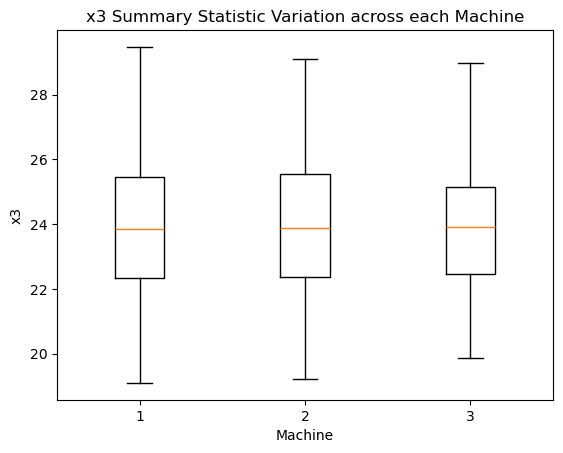

In [ ]:
# Boxplot for summary statistics of operating variable x3

plt.boxplot([m01_df['x3'], m02_df['x3'], m03_df['x3']])

plt.xlabel('Machine')
plt.ylabel('x3')
plt.title('x3 Summary Statistic Variation across each Machine')
plt.show()

The machines all have close medians around 24 for x3, but Machine 3 has slightly less variability, just like the other operating variables so far. The range is the largest for Machine 1, slightly shorter for Machine 2, and shortest for Machine 3. This means Machine 3 is, again, more consistent for x3.  

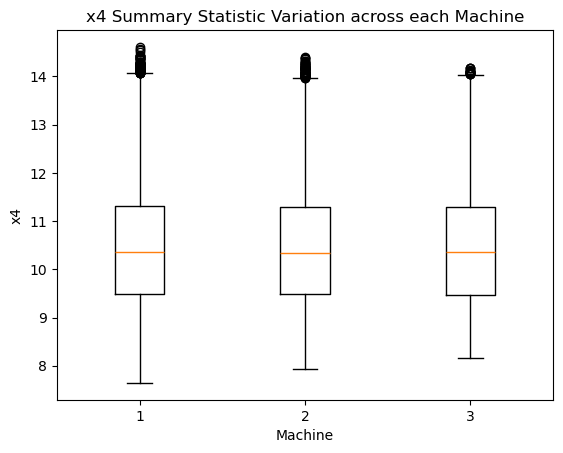

In [ ]:
# Boxplot for summary statistics of operating variable x4

plt.boxplot([m01_df['x4'], m02_df['x4'], m03_df['x4']])

plt.xlabel('Machine')
plt.ylabel('x4')
plt.title('x4 Summary Statistic Variation across each Machine')
plt.show()

Again, for x4 the machines have similar medians and variability in the 50%. Machine 3 has the least variatbility which makes it the most consistent for x4. All three machines have outliers at a very high range of 14 and above.


### Summary statistics of operating variables x1 through x4 vary across the Batch values

Instead of reading 50 box plots, below is 4 line plots for each operating variable showing the standard deviation for each batch.



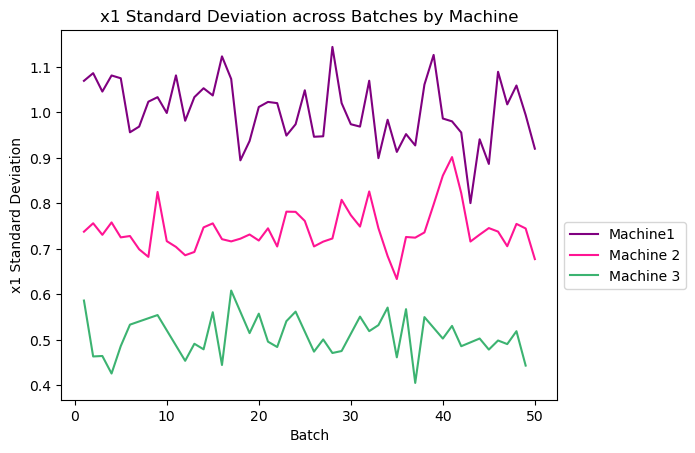

In [ ]:
# Line plot for standard deviation of x1, x2, x3, and x4 on all machines
# Had to Google how to get the legend out of the box

m01_df.groupby('Batch')['x1'].std().plot(color='purple', label= 'Machine1')
m02_df.groupby('Batch')['x1'].std().plot(color='deeppink', label= 'Machine 2')
m03_df.groupby('Batch')['x1'].std().plot(color='mediumseagreen', label='Machine 3')

plt.xlabel('Batch')
plt.ylabel('x1 Standard Deviation')
plt.title('x1 Standard Deviation across Batches by Machine')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

Looking at the standard deviation of x1 in each Batch for the machines, the standard deviation for Machine 3 is the lowest, which means Machine 3 produces the most consistent x1. Machine 2 is moderate, and Machine 1 produces high variation.
* Machine 1: Std around 0.8-1.1 --> very variable
* Machine 2: Std around 0.6-0.9 --> moderate
* Machine 3: Std around 0.4-0.6 --> least variable

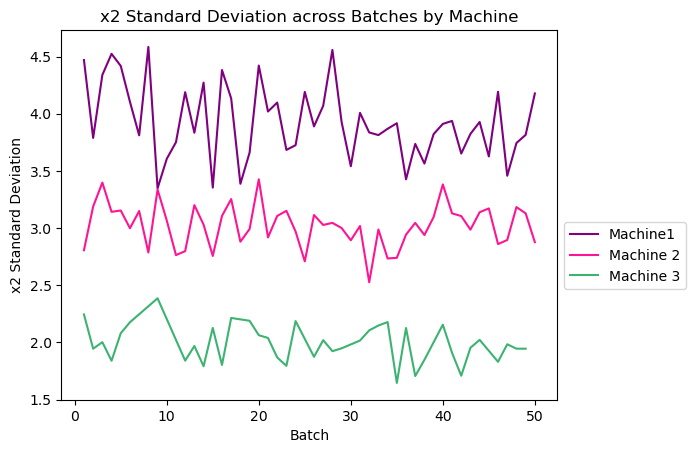

In [ ]:
# Line plot for mean and standard deviation of x1, x2, x3, and x4 on all machines
# Had to Google how to get the legend out of the box

m01_df.groupby('Batch')['x2'].std().plot(color='purple', label= 'Machine1')
m02_df.groupby('Batch')['x2'].std().plot(color='deeppink', label= 'Machine 2')
m03_df.groupby('Batch')['x2'].std().plot(color='mediumseagreen', label='Machine 3')

plt.xlabel('Batch')
plt.ylabel('x2 Standard Deviation')
plt.title('x2 Standard Deviation across Batches by Machine')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

The standard devation is different for each machine. Again, Machine 3 has the lowest standard deviation which tells me it is the most consistent for x2. Machine 2 is moderate and Machine 1 has the highest standard devaition which leads me to believe this machine is not consistent...
* Machine 1: Std around 3.5-4.5 --> very variable
* Machine 2: Std around 2.5-3.5 --> moderate
* Machine 3: Std around 1.5-2.4 --> least variable

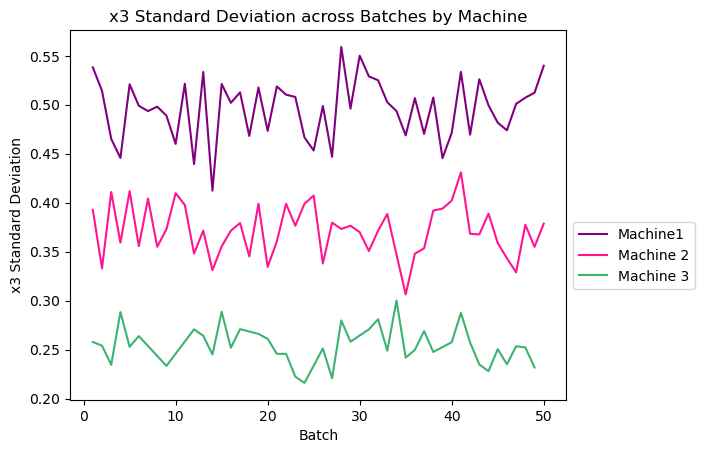

In [ ]:
# Line plot for mean and standard deviation of x1, x2, x3, and x4 on all machines
# Had to Google how to get the legend out of the box

m01_df.groupby('Batch')['x3'].std().plot(color='purple', label= 'Machine1')
m02_df.groupby('Batch')['x3'].std().plot(color='deeppink', label= 'Machine 2')
m03_df.groupby('Batch')['x3'].std().plot(color='mediumseagreen', label='Machine 3')

plt.xlabel('Batch')
plt.ylabel('x3 Standard Deviation')
plt.title('x3 Standard Deviation across Batches by Machine')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

The results are similar to x1 and x2 since Machine 3 is the most consistent because the standard deviation is the lowest. Machine 2 is moderate, and Machine 1 has more inconsistency since the standard devieation is the highest.

* Machine 1: Std around 0.45-0.55 --> very variable
* Machine 2: Std around 0.3-0.45 --> moderate
* Machine 3: Std around 0.20-0.30 --> least variable

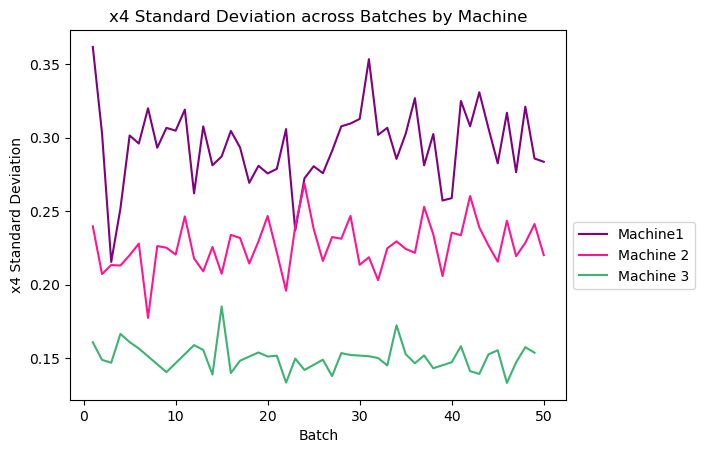

In [ ]:
# Line plot for mean and standard deviation of x1, x2, x3, and x4 on all machines
# Had to Google how to get the legend out of the box

m01_df.groupby('Batch')['x4'].std().plot(color='purple', label= 'Machine1')
m02_df.groupby('Batch')['x4'].std().plot(color='deeppink', label= 'Machine 2')
m03_df.groupby('Batch')['x4'].std().plot(color='mediumseagreen', label='Machine 3')

plt.xlabel('Batch')
plt.ylabel('x4 Standard Deviation')
plt.title('x4 Standard Deviation across Batches by Machine')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

Results are the same across all operating variables. Machine 3 overall seems to have the most consistency. Machine 2 is moderate in consistency, but Machine 1 varies a lot- It could be extreme or inconsistent.


#### Relationships between operating variables across all machines

In [ ]:
# Correlation for Machine 1

m01_df[['x1','x2', 'x3', 'x4']].corr()

x1        x2        x3        x4
x1  1.000000  0.725695  0.117574 -0.191357
x2  0.725695  1.000000  0.064586  0.091319
x3  0.117574  0.064586  1.000000 -0.584667
x4 -0.191357  0.091319 -0.584667  1.000000

* x1 and x2 have a strong positive relationship
* Many are weak in here since they are not close to -1 or 1
* x3 and x4 is worth exploring if it changes by machine since it's slightly negative

In [ ]:
# Correlation for Machine 2

m02_df[['x1','x2', 'x3', 'x4']].corr()

x1        x2        x3        x4
x1  1.000000  0.850194  0.110249 -0.187127
x2  0.850194  1.000000  0.056123  0.102422
x3  0.110249  0.056123  1.000000 -0.569695
x4 -0.187127  0.102422 -0.569695  1.000000

* x1 and x2 are even more strongly and positively correlated than machine 1
* x3 and x4 are also worth exploring again since they are slightly negatively correlated
* The rest are weakly correlated

In [ ]:
# Correlation for Machine 3

m03_df[['x1','x2', 'x3', 'x4']].corr()

x1        x2        x3        x4
x1  1.000000  0.883526  0.093064 -0.199686
x2  0.883526  1.000000 -0.024685  0.114277
x3  0.093064 -0.024685  1.000000 -0.573415
x4 -0.199686  0.114277 -0.573415  1.000000

* Same results as Machine 1 and 2
* x1 and x2 are postiviely correlated and x3 and x4 are worth exploring more.
* On Machine 3, x2 and x3 are very weakly correlated, but moderately and positively correlated on Machine 1 and 2.


#### Since I am not supposed to add a machine_id column until the conclusion of the problem, I will have to use separate scatter plots instead of sns.lmplot to show the relationship between variables across the machines.

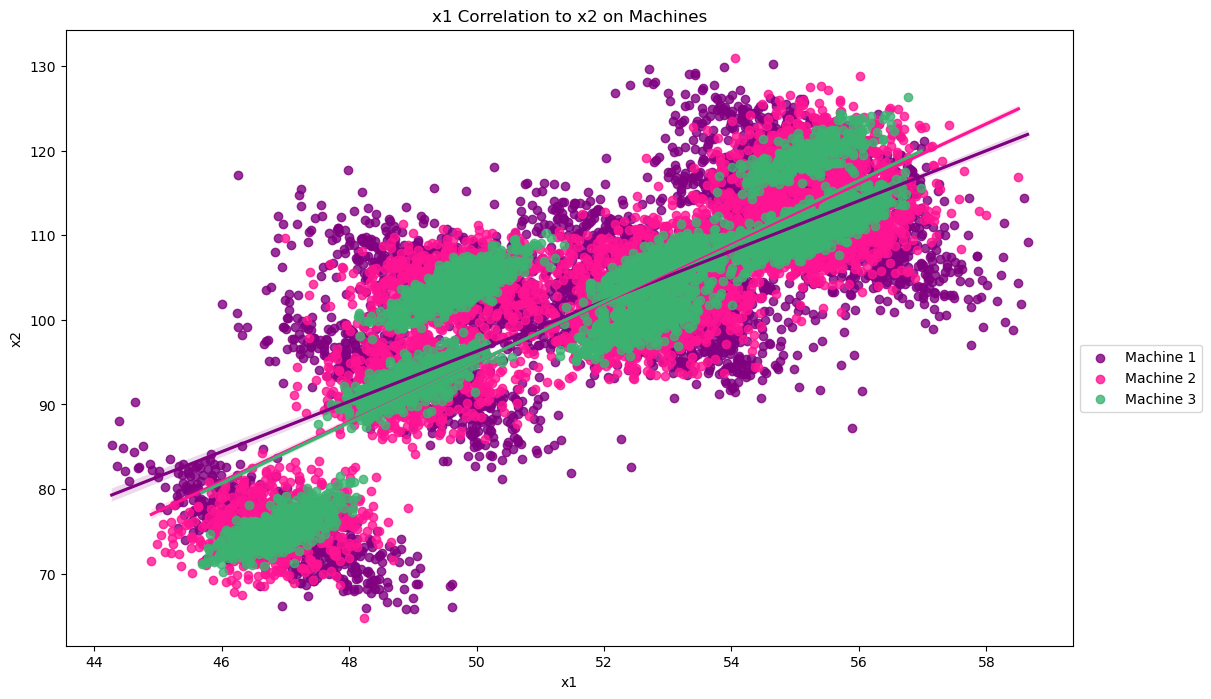

In [ ]:
# x1 and x2 on Machines
# Source: Google- how to move legend box

plt.figure(figsize=(13,8))

sns.regplot(data=m01_df, x='x1', y='x2', color='purple', label ='Machine 1')
sns.regplot(data=m02_df, x='x1', y='x2', color='deeppink', label ='Machine 2')
sns.regplot(data=m03_df, x='x1', y='x2', color='mediumseagreen', label ='Machine 3')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('x1 Correlation to x2 on Machines')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# machines may be similar in Batch/process , with some variation based on the clusters of points being similar to each other

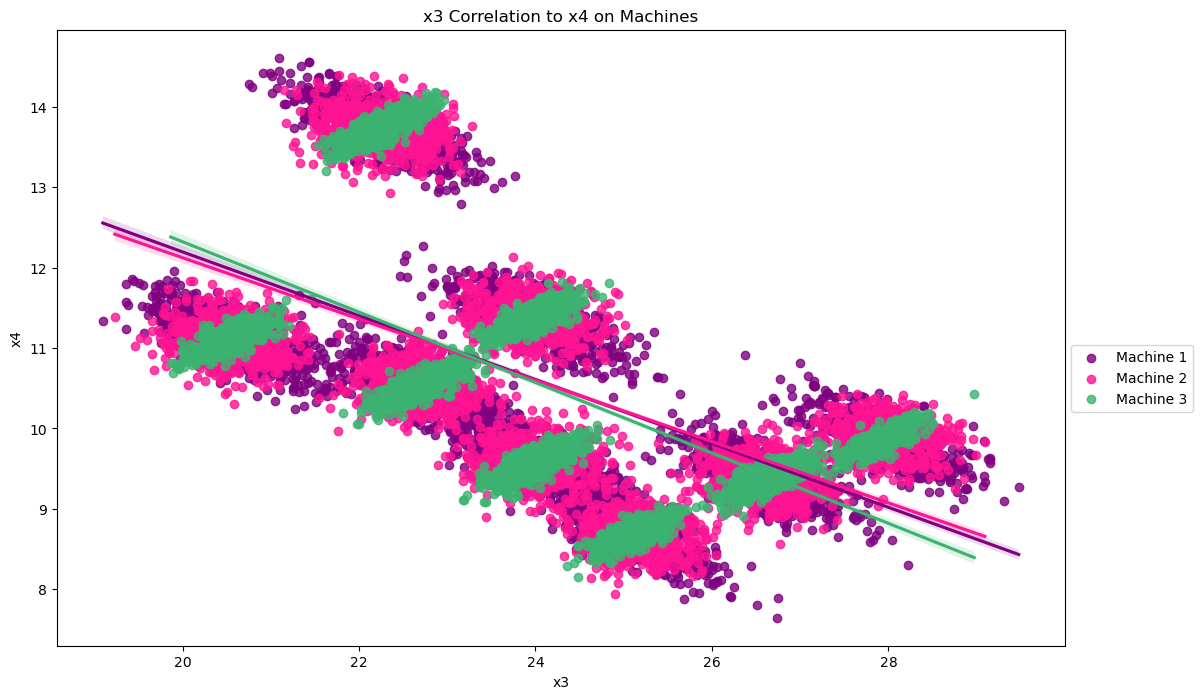

In [ ]:
# x3 and x4 on Machines
# Source: Google- how to move legend box

plt.figure(figsize=(13,8))

sns.regplot(data=m01_df, x='x3', y='x4', color='purple', label ='Machine 1')
sns.regplot(data=m02_df, x='x3', y='x4', color='deeppink', label ='Machine 2')
sns.regplot(data=m03_df, x='x3', y='x4', color='mediumseagreen', label ='Machine 3')

plt.xlabel('x3')
plt.ylabel('x4')
plt.title('x3 Correlation to x4 on Machines')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
#  Again machines may be similar in Batch/process , with some variation based on the clusters of points being similar to each other

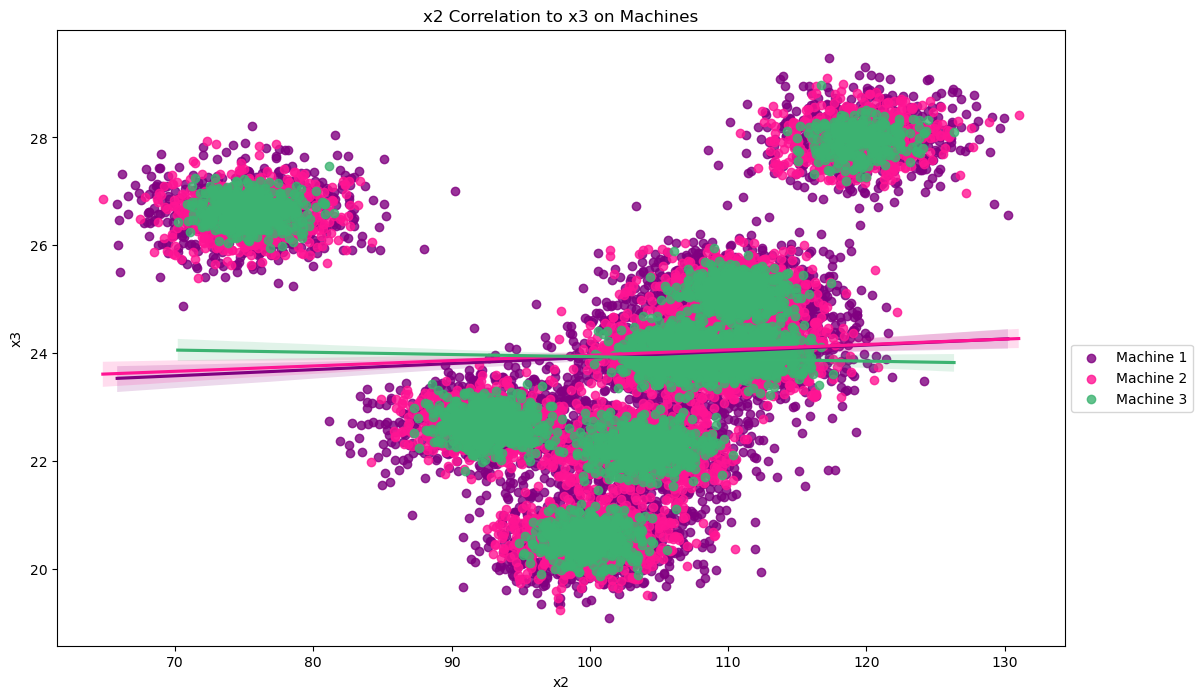

In [ ]:
# x2 and x3 on Machines
# Source: Google- how to move legend box

plt.figure(figsize=(13,8))

sns.regplot(data=m01_df, x='x2', y='x3', color='purple', label ='Machine 1')
sns.regplot(data=m02_df, x='x2', y='x3', color='deeppink', label ='Machine 2')
sns.regplot(data=m03_df, x='x2', y='x3', color='mediumseagreen', label ='Machine 3')

plt.xlabel('x2')
plt.ylabel('x3')
plt.title('x2 Correlation to x3 on Machines')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# Nothing significant here in correlation besides the clusters of all machines
# Which means they operate similarly

### Relationships between the OPERATING VARIABLES x1 through x4 vary across the Batch values

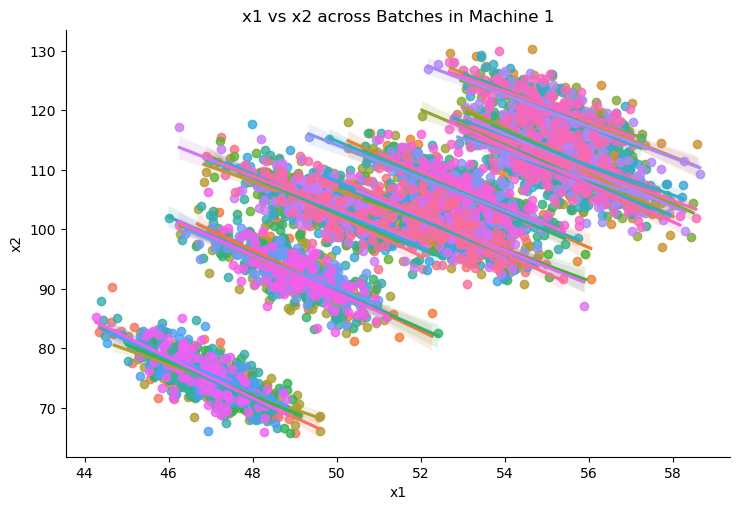

In [ ]:
sns.lmplot(data=m01_df, x='x1', y='x2', hue='Batch', legend=False,
           aspect=1.5)


plt.title('x1 vs x2 across Batches in Machine 1')
plt.show()

Different batches occupy different parts of the plot, both variables increasing. Around 52-55 have some overlap. The correlation is negative.

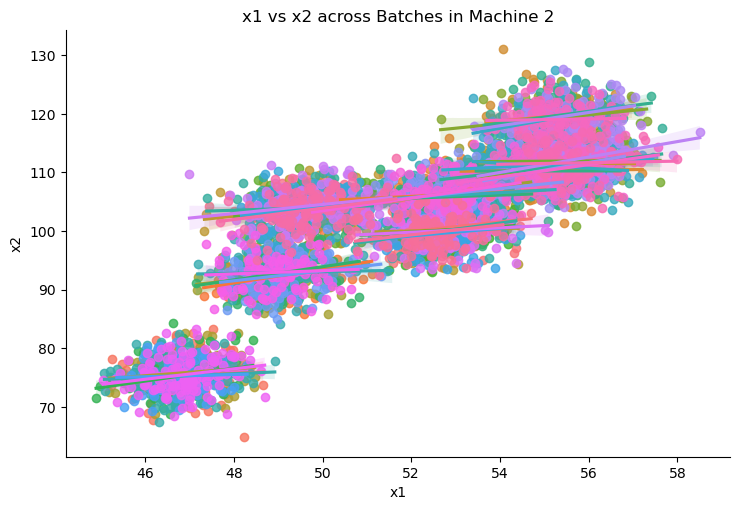

In [ ]:
sns.lmplot(data=m02_df, x='x1', y='x2', hue='Batch', legend=False,
           aspect=1.5)


plt.title('x1 vs x2 across Batches in Machine 2')
plt.show()

The relationship changes here in Machine 2, the x1 and x2 variables are much less correlated when shown by batch. The cluster shapes change, and there's more overlap. The correlation is very weak here.

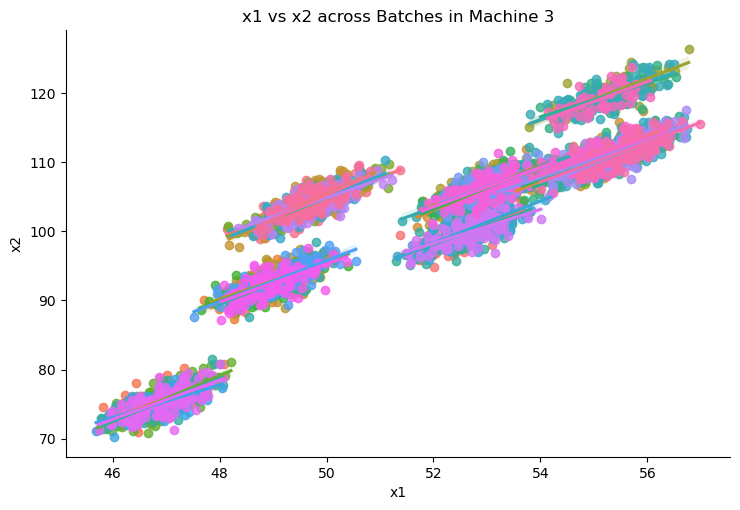

In [ ]:
sns.lmplot(data=m03_df, x='x1', y='x2', hue='Batch', legend=False,
           aspect=1.5)


plt.title('x1 vs x2 across Batches in Machine 3')
plt.show()

The correlation is postive in Machine 3. The clusters overlap less until around 52 on x1.

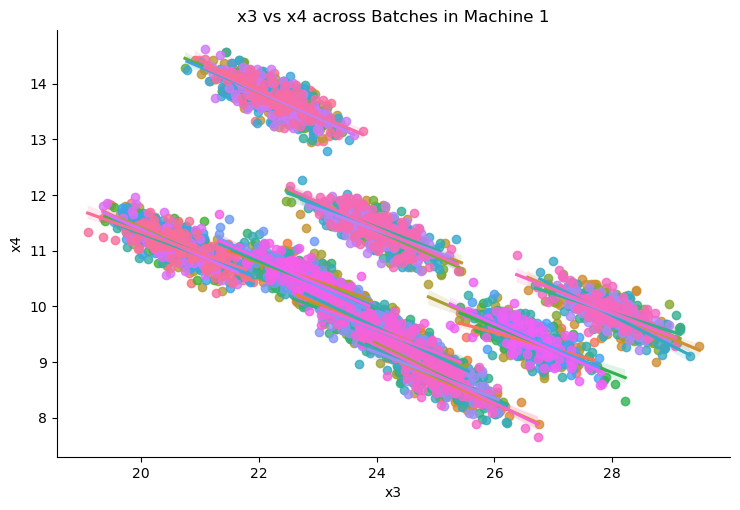

In [ ]:
sns.lmplot(data=m01_df, x='x3', y='x4', hue='Batch', legend=False,
           aspect=1.5)


plt.title('x3 vs x4 across Batches in Machine 1')
plt.show()

In [ ]:
# The correlation is negative with some overlap around 21 - 26 on x3

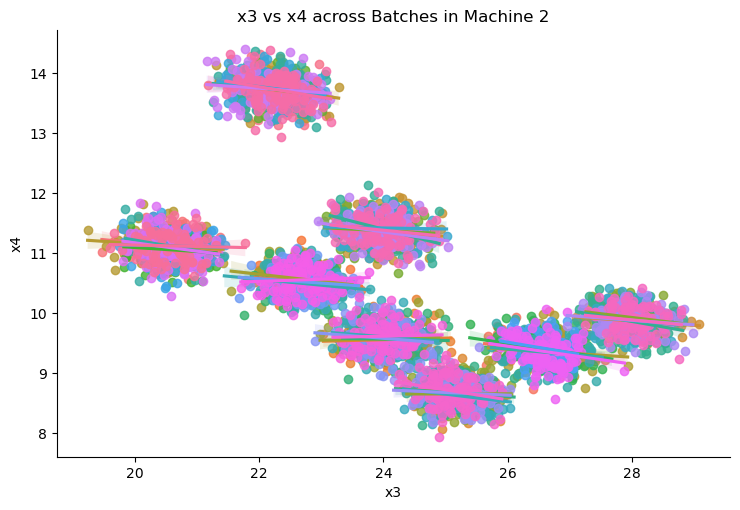

In [ ]:
sns.lmplot(data=m02_df, x='x3', y='x4', hue='Batch', legend=False,
           aspect=1.5)


plt.title('x3 vs x4 across Batches in Machine 2')
plt.show()

In [ ]:
# The clusters and correlation change, the clusters are more separate and the corerlation appears very weak.

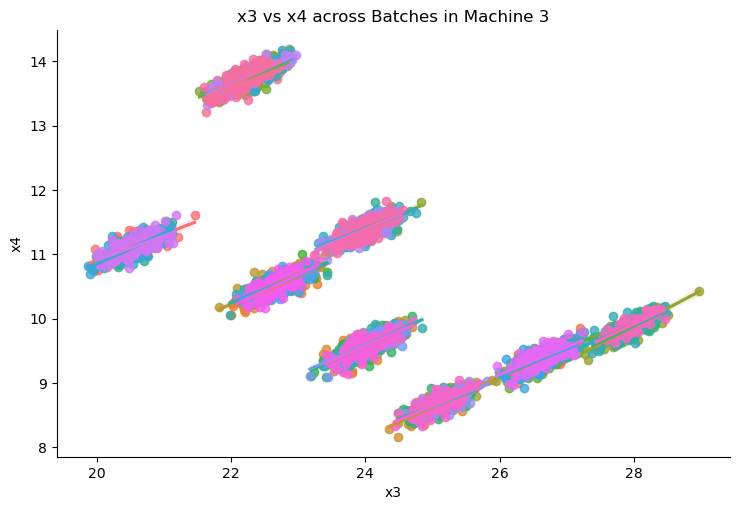

In [ ]:
sns.lmplot(data=m03_df, x='x3', y='x4', hue='Batch', legend=False,
           aspect=1.5)


plt.title('x3 vs x4 across Batches in Machine 3')
plt.show()

In [ ]:
# On machine 3, the clusters do not overlap much, and are positively correlated.

# Conclusion: Each machine behaves differently by Batch for each operating variable.

# This could potentially mean there's a different performance, condition, or environment.

# The variation between each batch could tells us how stable or sensitive it is.

In [ ]:
m01_df['machine_id']=1

In [ ]:
m02_df['machine_id']=2

In [ ]:
m03_df['machine_id']=3

In [ ]:
print(m01_df.columns)
print(m02_df.columns)
print(m03_df.columns)

Index(['ID', 'Batch', 's_id', 'x1', 'x2', 'x3', 'x4', 'machine_id'], dtype='object')
Index(['ID', 'Batch', 's_id', 'x1', 'x2', 'x3', 'x4', 'machine_id'], dtype='object')
Index(['ID', 'Batch', 's_id', 'x1', 'x2', 'x3', 'x4', 'machine_id'], dtype='object')


In [ ]:
# concatenate the 3 DataFrames into a single DataFrame which includes the `machine_id` variable

machine_df = pd.concat([m01_df, m02_df, m03_df], ignore_index=True)

## Problem 02

The supplier batch data set file name is provided for you below. You must read in the CSV file and assign the data set to the `batch_df` object.

You must perform the following **ESSENTIAL** activities:

* How many rows and columns are in the data?
* What are the names and data types for each column?
* How many unique values are there for each column?
* How many missing values are there for each column?

You must visually explore the MARGINAL behavior of the variables in the data. You must use visualizations appropriate for the DATA TYPE of the columns.

You must visually explore RELATIONSHIPS between variables in the data. You must use visualizations appropriate for the DATA TYPES. You must make sure that your visualizations can answer the following questions:
* Do the summary statistics for `Density` depend on the `Supplier`?
* Does the average `Density` depend on the `Supplier`?
* How does `Density` relate to `Batch` for each `Supplier`?

After exploring the `batch_df` DataFrame, you **MUST** JOIN/MERGE the `batch_df` DataFrame with the `machine_df` DataFrame. Assign the merged DataFrame to the `dfa` DataFrame.

You can now explore the relationships between the MACHINE OPERATIONAL VARIABLES and the SUPPLIERS! You must use visualizations to explore the following relationships:
* Explore if the summary statistics of the 4 OPERATING VARIABLES `x1` through `x4` vary across `Batch` for each MACHINE given each `Supplier`. Your figures MUST use `Batch` as the x-axis variable.
* Explore if the relationships between the 4 OPERATING VARIABLES `x1` through `x4` vary across `Supplier`.

You may add as many markdown and code cells as you see fit to answer this question.

#### SOLUTION

In [ ]:
# define the batch supplier file
batch_file = 'midterm_supplier.csv'

In [ ]:
# read in the batch supplier data set

batch_df = pd.read_csv(batch_file)

In [ ]:
# Number of rows-50 and columns-3

batch_df.shape

(50, 3)

In [ ]:
# Column names and data types

batch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Batch     50 non-null     int64  
 1   Supplier  50 non-null     object 
 2   Density   50 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


In [ ]:
# Unique values per column
# There are 2 suppliers and 50 batches

batch_df.nunique()

Batch       50
Supplier     2
Density     50
dtype: int64

In [ ]:
# Missing values per column

batch_df.isna().sum()

Batch       0
Supplier    0
Density     0
dtype: int64

In [ ]:
# Marginal behavior of variables in Supplier Data set

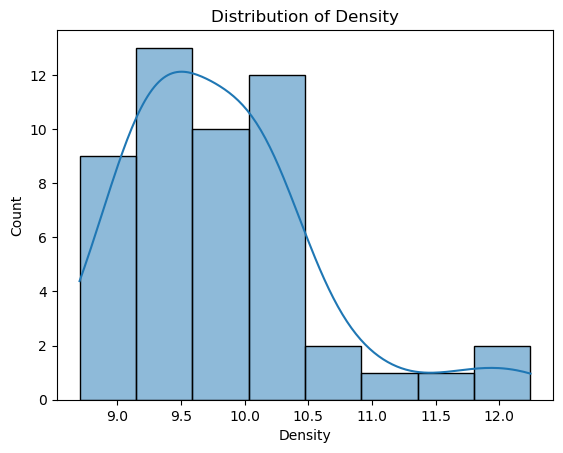

In [ ]:
# marginal distribution of density variable

sns.histplot(batch_df['Density'], kde=True)

plt.title('Distribution of Density')
plt.show()

In [ ]:
# Most density values are located between 9-10.5. There are fewer density values after 10.5.

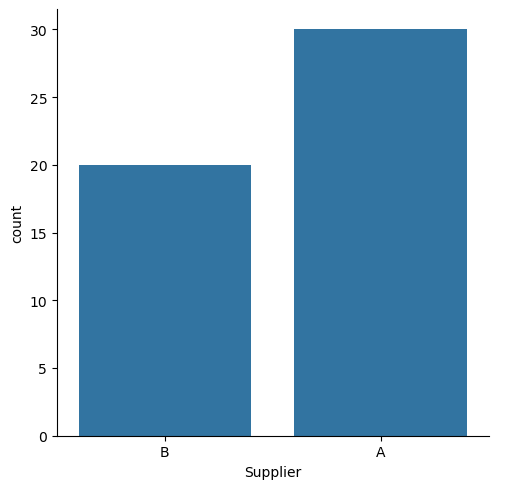

In [ ]:
# marginal distribution of supplier variable

sns.catplot(data=batch_df, x='Supplier', kind='count')

plt.show()

In [ ]:
# Supplier A provides 30 batches and Supplier B provides 20 batches.

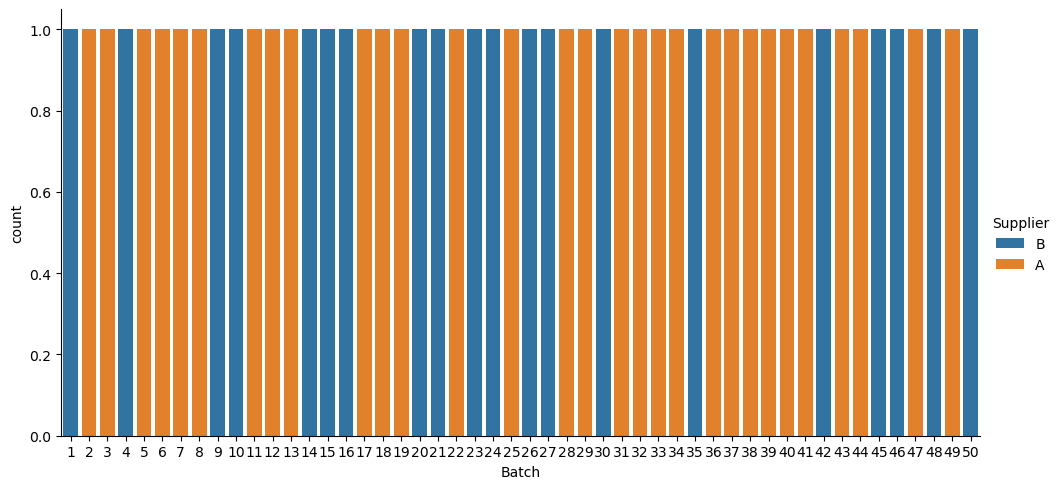

In [ ]:
sns.catplot(data=batch_df, x='Batch', hue='Supplier', kind='count', aspect=2)

plt.show()

In [ ]:
# This shows all 50 batches appear once in the data. Alternating between orange/blue identifies suppliers.

In [ ]:
# Explore relationships between variables in the data

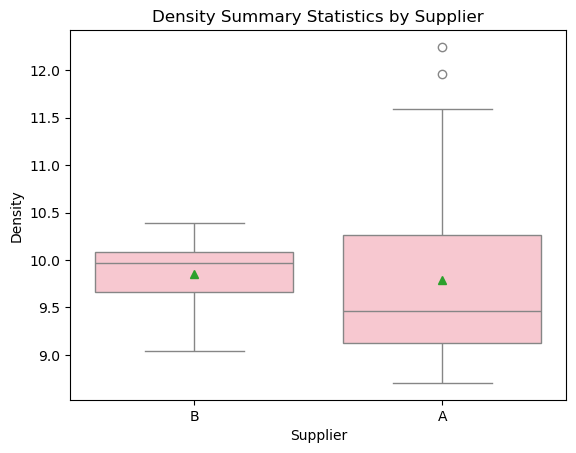

In [ ]:
# Do summary statistics for Density depend on the supplier

sns.boxplot(data=batch_df, x='Supplier', y='Density', showmeans=True, color='pink')

plt.title('Density Summary Statistics by Supplier')
plt.show()

In [ ]:
# Supplier B has a smaller range than A. Both of the medians are very close to 10. Supplier A shows more variation in batch density.

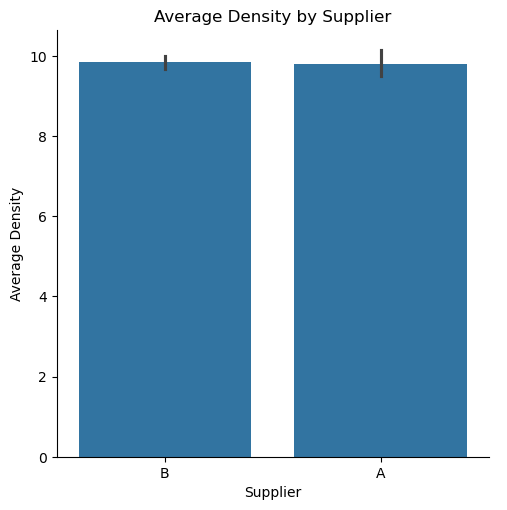

In [ ]:
# Does average density depend of the supplier

sns.catplot(data=batch_df, x='Supplier', y='Density', estimator='mean', kind='bar')

plt.title('Average Density by Supplier')
plt.ylabel('Average Density')
plt.show()

In [ ]:
# Both suppliers have the same average density close to 10. The error bar shows it's slightly less consistent for Supplier A.

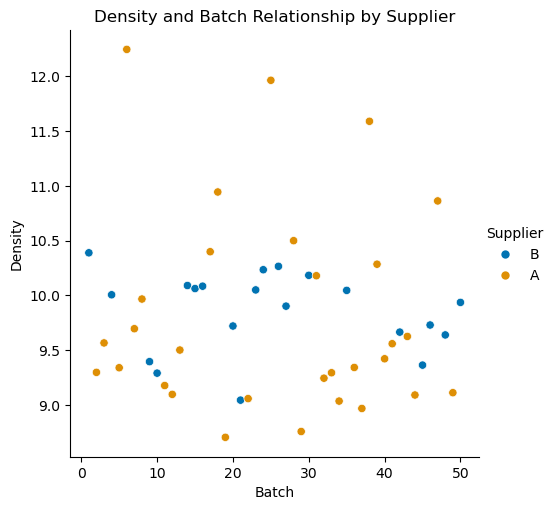

In [ ]:
# Density relationship to Batch for each supplier

sns.relplot(data=batch_df, x='Batch', y='Density', hue='Supplier', palette='colorblind')

plt.title('Density and Batch Relationship by Supplier')
plt.show()

In [ ]:
# Most values for both suppliers are below 10.5. Supplier A has a few above 10.5. Density is fairly consistent across batches.

In [ ]:
batch_df.groupby(['Supplier', 'Batch'])['Density'].mean()

Supplier  Batch
A         2         9.296880
          3         9.565636
          5         9.339177
          6        12.246089
          7         9.695526
          8         9.966524
          11        9.176533
          12        9.095899
          13        9.500716
          17       10.398586
          18       10.943962
          19        8.703627
          22        9.057283
          25       11.963966
          28       10.499405
          29        8.756711
          31       10.179347
          32        9.243669
          33        9.293373
          34        9.034611
          36        9.341639
          37        8.967161
          38       11.589538
          39       10.284600
          40        9.420988
          41        9.558478
          43        9.624945
          44        9.090145
          47       10.862295
          49        9.111256
B         1        10.388587
          4        10.005387
          9         9.394692
          10        9.28981

In [ ]:
# merge the batch supplier data set with the (concatenated) machine data set

dfa = pd.merge(machine_df, batch_df, on='Batch', how='inner')

In [ ]:
dfa.head()

ID  Batch  s_id         x1          x2         x3         x4  \
0  B001-M01-S001      1     1  50.117118  102.167346  22.067812  13.889524   
1  B001-M01-S002      1     2  46.887333  112.266102  23.197330  13.064709   
2  B001-M01-S003      1     3  50.132744  103.674908  22.319933  13.647482   
3  B001-M01-S004      1     4  48.501042  107.143156  22.162947  14.077758   
4  B001-M01-S005      1     5  49.690442  102.120283  22.248696  13.728666   

   machine_id Supplier    Density  
0           1        B  10.388587  
1           1        B  10.388587  
2           1        B  10.388587  
3           1        B  10.388587  
4           1        B  10.388587

In [ ]:
dfa.shape

(14729, 10)

In [ ]:
dfa.tail()

ID  Batch  s_id         x1          x2         x3  \
14724  B049-M03-S100     49   100  49.278415  102.089925  22.396979   
14725  B049-M03-S101     49   101  49.264754  104.619874  21.977716   
14726  B049-M03-S102     49   102  49.465358  102.867473  22.257845   
14727  B049-M03-S103     49   103  49.751785  104.863427  22.461204   
14728  B049-M03-S104     49   104  49.819212  104.075176  22.462165   

              x4  machine_id Supplier   Density  
14724  13.753264           3        A  9.111256  
14725  13.636539           3        A  9.111256  
14726  13.678206           3        A  9.111256  
14727  13.880084           3        A  9.111256  
14728  13.853014           3        A  9.111256

In [ ]:
dfa.Supplier.value_counts()

Supplier
A    9140
B    5589
Name: count, dtype: int64

In [ ]:
# Explore relationsips between machine operational variables and suppliers

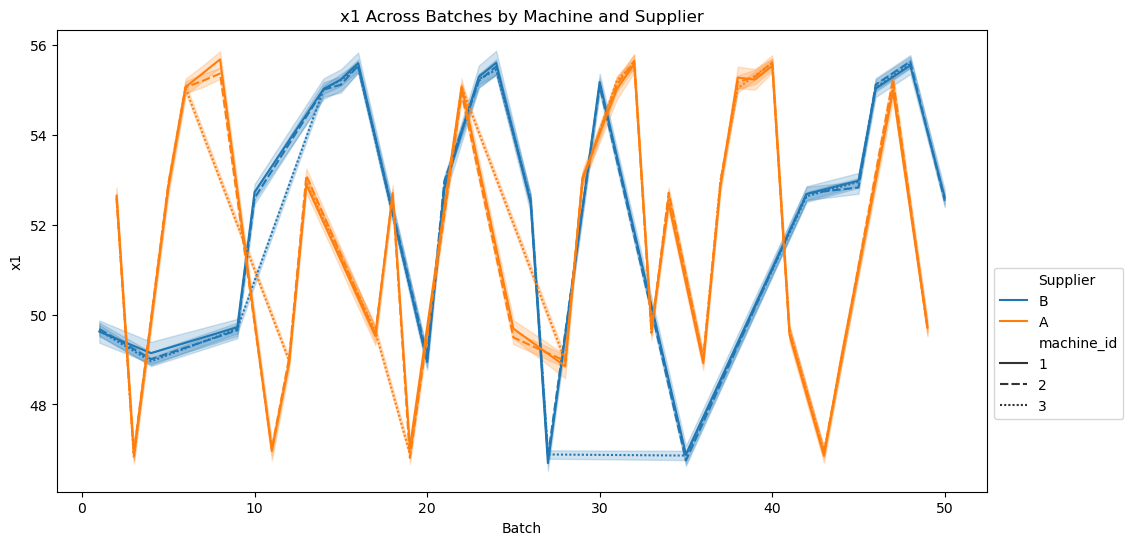

In [ ]:
# x1 across batches, machine, and supplier

plt.figure(figsize=(12,6))

sns.lineplot(data=dfa, x='Batch', y='x1', hue='Supplier', style='machine_id')

plt.title('x1 Across Batches by Machine and Supplier')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

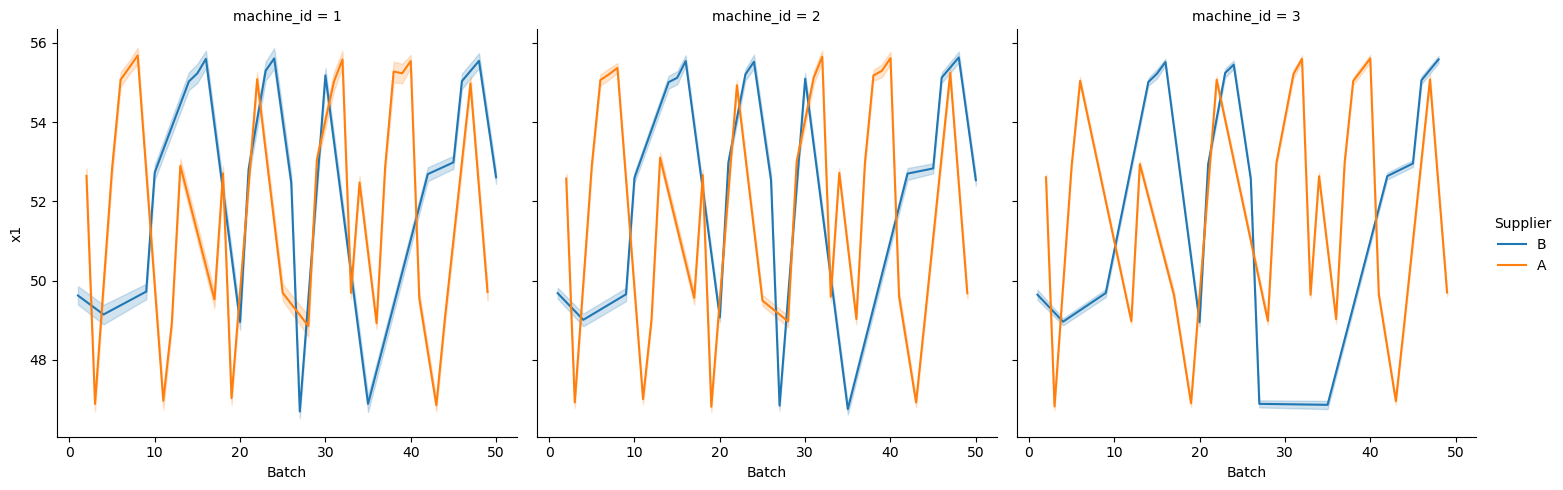

In [ ]:
sns.relplot(data=dfa, x='Batch', y='x1', hue='Supplier', col='machine_id', kind='line')

plt.show()

In [ ]:
# x1 across batches machine are very similar... besides machine 3 close to batch 10 and around 30.
# x1 across supplier is different, and has some opposite variations (ex: batch 30 between Supplier A and B is opposite).

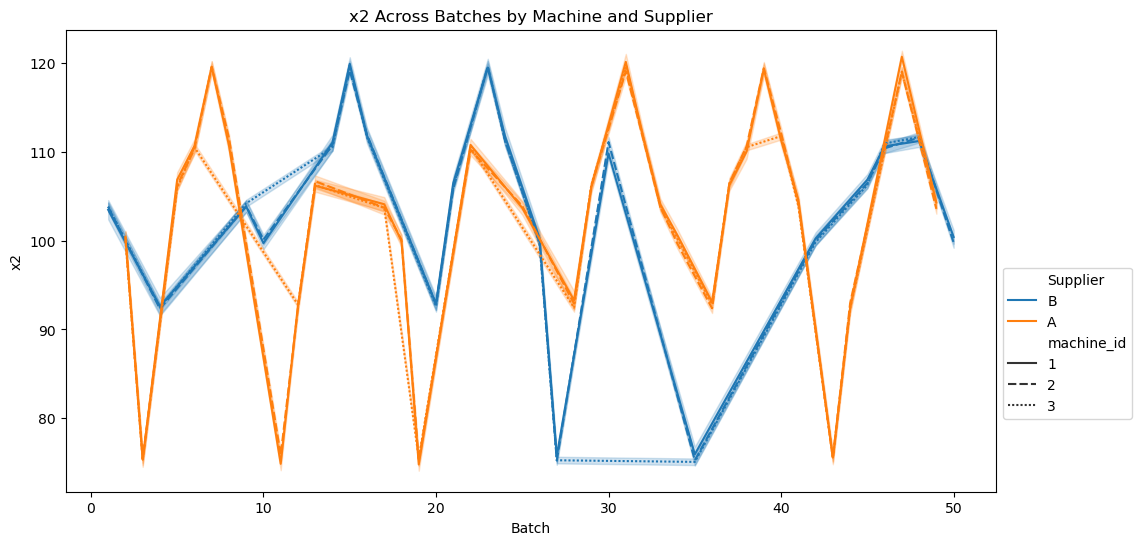

In [ ]:
# x2 across batches, machine, and supplier

plt.figure(figsize=(12,6))

sns.lineplot(data=dfa, x='Batch', y='x2', hue='Supplier', style='machine_id')

plt.title('x2 Across Batches by Machine and Supplier')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# x2 across batches between supplier and machine are very similar... nearly identical besides machine 3 around batch 10 and 30.
# x2 shows Supplier A and B have some opposite actions(ex: between batch 10 and 20 supplier A dips in the x2 variable.

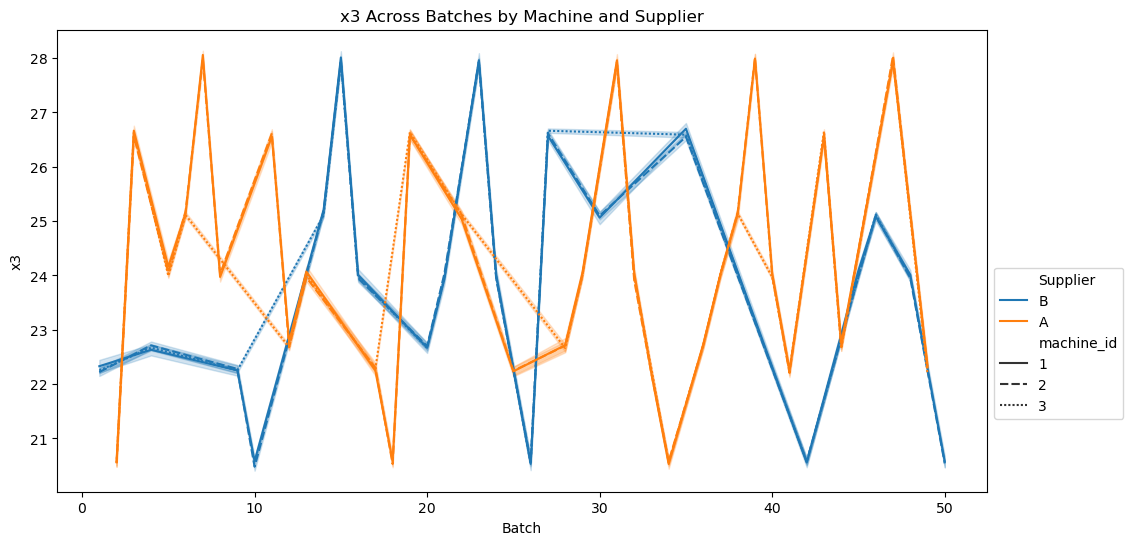

In [ ]:
# x3 across batches, machine, and supplier

plt.figure(figsize=(12,6))

sns.lineplot(data=dfa, x='Batch', y='x3', hue='Supplier', style='machine_id')

plt.title('x3 Across Batches by Machine and Supplier')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# Supplier A and B have variation for x3 by Batch. They have peaks at different points

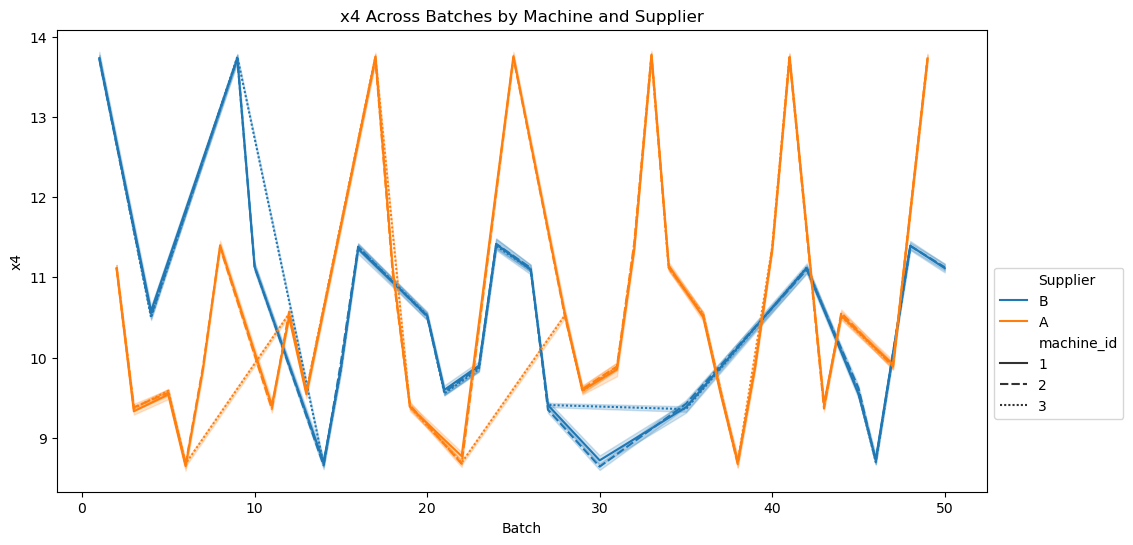

In [ ]:
# x4 across batches, machine, and supplier

plt.figure(figsize=(12,6))

sns.lineplot(data=dfa, x='Batch', y='x4', hue='Supplier', style='machine_id')

plt.title('x4 Across Batches by Machine and Supplier')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

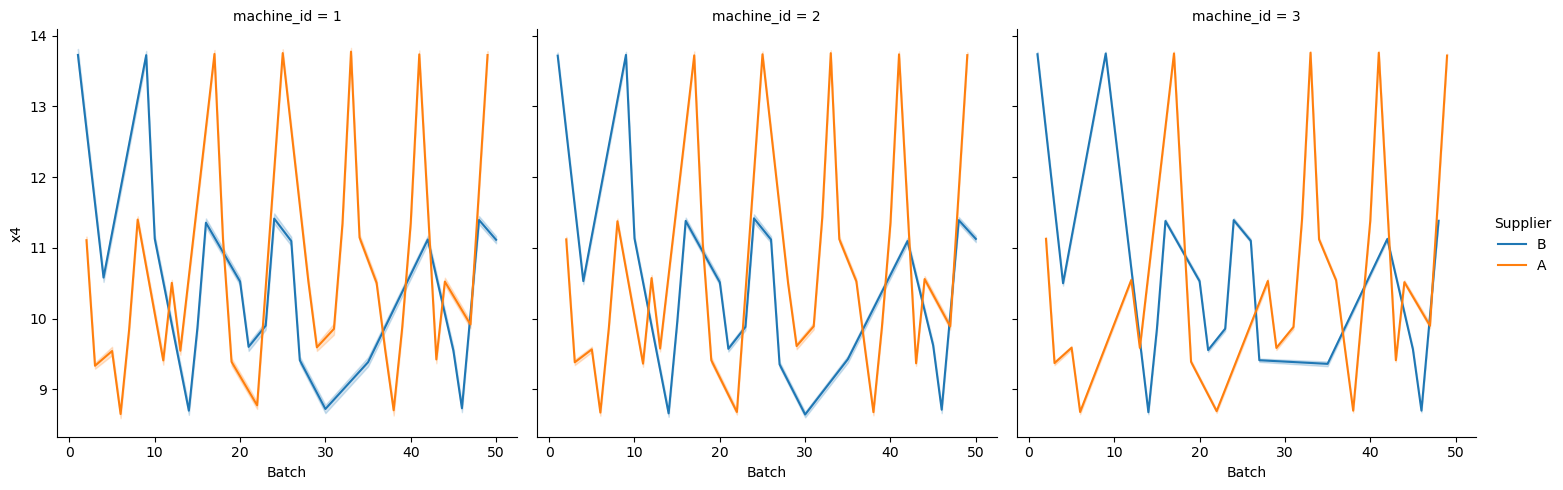

In [ ]:
sns.relplot(data=dfa, x='Batch', y='x4', hue='Supplier', col='machine_id', kind='line')

plt.show()

In [ ]:
# The machines are similar in pattern but the Suppliers are very different from each other. Supplier A has more higher peaks than B.

# Overall, these results tell me x1-x4 do not vary as much by machine as they do by Supplier.
# However, let's look more closely at just the relationship between the operating variables across supplier below.

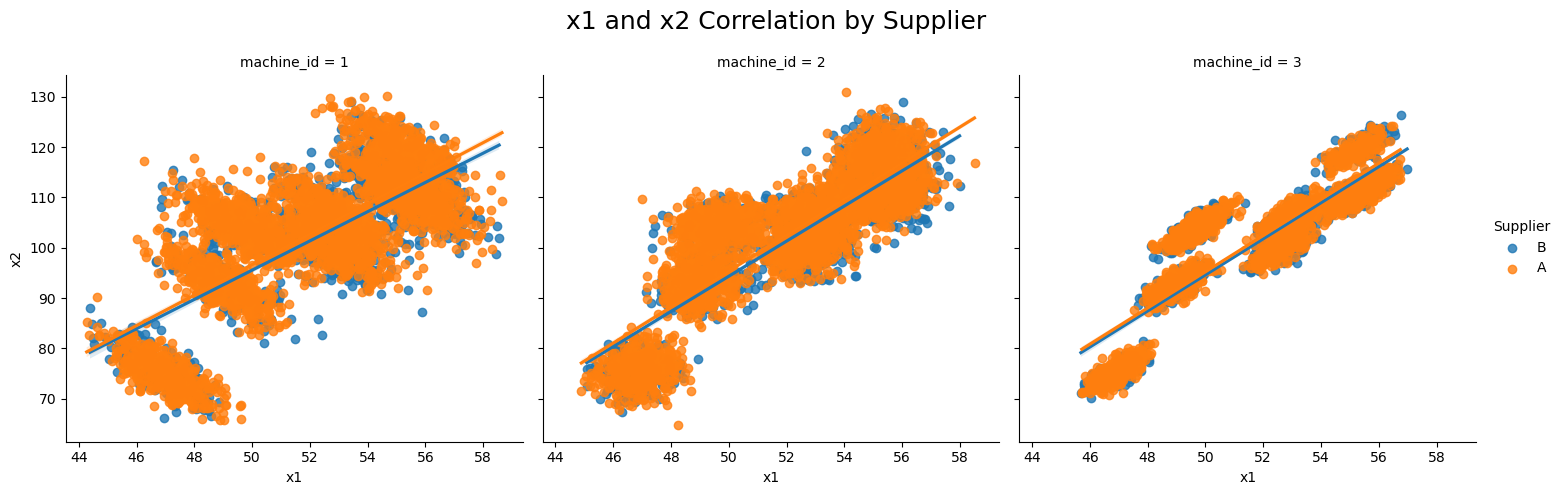

In [ ]:
# x1 and x2 across supplier
# I had to Google how to adjust the title and space it away from the charts so the source for formatting is Google

sns.lmplot(data=dfa, x='x1', y='x2', hue='Supplier', col='machine_id')

plt.suptitle('x1 and x2 Correlation by Supplier', fontsize=18)
plt.subplots_adjust(top=0.85)
plt.show()

In [ ]:
# The correlation between each supplier is nearly the same- strong positive correlation.

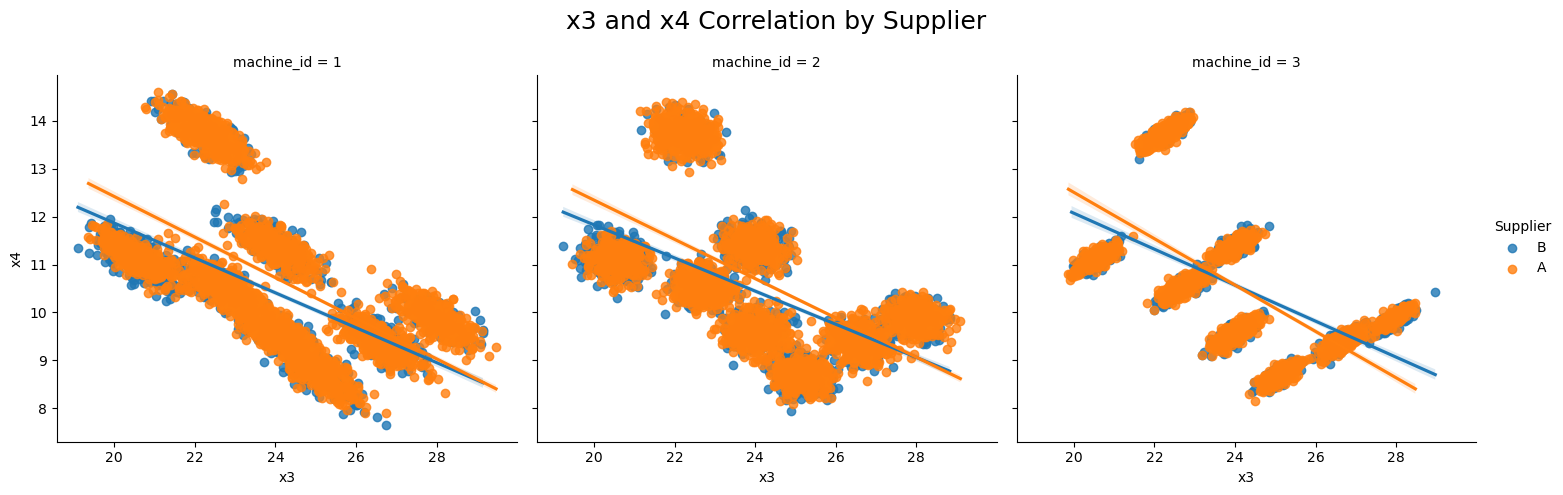

In [ ]:
# x3 and x4 across supplier
# I had to Google how to adjust the title and space it away from the charts so the source for formatting is Google

sns.lmplot(data=dfa, x='x3', y='x4', hue='Supplier', col='machine_id')

plt.suptitle('x3 and x4 Correlation by Supplier', fontsize=18)
plt.subplots_adjust(top=0.85)
plt.show()

In [ ]:
# The correlation between x3 and x4 across supplier is nearly the same, a negative correlation.

# Overall, the correlation does not change between operating variables across supplier.

## Problem 03

The DROP TEST result data set file name is provided for you below. You must read in the CSV file and assign the dta set to the `test_df` object.

You must perform the following **ESSENTIAL** activities:

* How many rows and columns are in the data?
* What are the names and data types for each column?
* How many unique values are there for each column?
* How many missing values are there for each column?

You must visually explore the MARGINAL behavior of the variables in the data. You must use visualizations appropriate for the DATA TYPE of the columns.

You must visually explore RELATIONSHIPS between variables in the data. You must use visualizations appropriate for the DATA TYPES. You must make sure that your visualizations can answer the following questions:
* Count the number of times each unique value of `Result` occurs for each `test_group_id` value.

After exploring the `test_df` DataFrame, you **MUST** JOIN/MERGE the `test_df` DataFrame with the `dfa` DataFrame. Assign the merged DataFrame to the `dfb` DataFrame. You **MUST** answer the following:
* How many rows remain using the DEFAULT joining procedure?

You may add as many markdown and code cells as you see fit to answer this question.

#### SOLUTION

In [ ]:
# define the test data set file name
test_file = 'midterm_test.csv'

In [ ]:
# read in the test data set

test_df = pd.read_csv(test_file)

In [ ]:
# rows and columns

test_df.shape

(1412, 3)

In [ ]:
# column names and data type in each column

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412 entries, 0 to 1411
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             1412 non-null   object
 1   test_group_id  1412 non-null   object
 2   Result         1412 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 33.2+ KB


In [ ]:
# unique values for each column

test_df.nunique()

ID               1412
test_group_id     141
Result              2
dtype: int64

In [ ]:
# missing values for each column

test_df.isna().sum()

ID               0
test_group_id    0
Result           0
dtype: int64

In [ ]:
# Marginal behavior of variables in the data

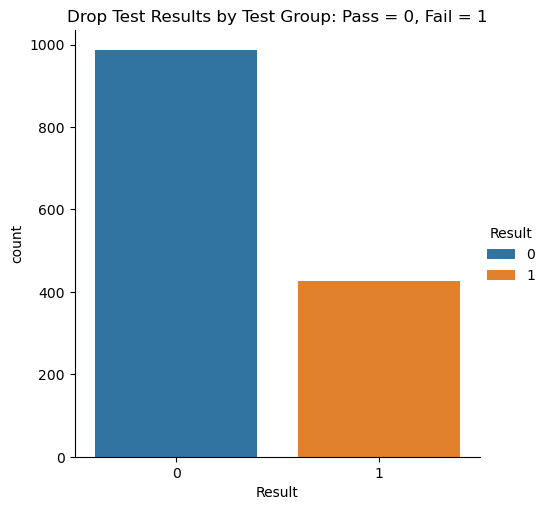

In [ ]:
# marginal behavior of Result

sns.catplot(data=test_df, x='Result', hue='Result', kind='count')

plt.title('Drop Test Results by Test Group: Pass = 0, Fail = 1')
plt.show()

In [ ]:
# Most of the results show that the cell phone case drop test passed, but just over 400 failed.

In [ ]:
# Marginal behavior of ID is not necessary since this is a random number and doesn't have mathematical meaning

In [ ]:
# Relationships between variables in the data

In [ ]:
# Count number of times each unique value of result occurs for each test group id value

test_df.groupby('test_group_id')['Result'].value_counts()

test_group_id  Result
A-0            1          6
               0          1
A-1            0          8
               1          4
A-2            0          5
                         ..
Z-1            1          2
Z-2            0          9
Z-3            0         10
Z-4            0         11
               1          1
Name: count, Length: 233, dtype: int64

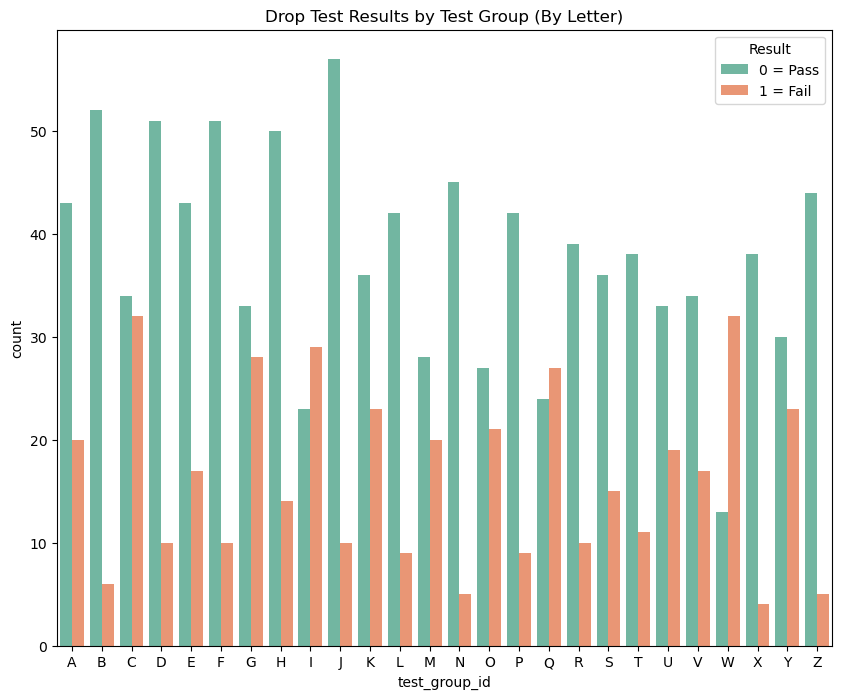

In [ ]:
# Number of times each unique value of Result occurs in the data

plt.figure(figsize=(10,8))

sns.countplot(data=test_df, x=test_df.test_group_id.str[0], hue= 'Result', palette='Set2')


plt.title('Drop Test Results by Test Group (By Letter)')
plt.legend(title='Result', labels=['0 = Pass', '1 = Fail'])
plt.show()

In [ ]:
# 'J' group ID has the most successful passes. The 'I' group ID has the least.
# Overall, this shows drop tests are not consistent across test groups. This could mean different conditions or materials.

In [ ]:
# merge test_df with the dfa object

dfb = pd.merge(dfa, test_df)

In [ ]:
# how many rows remain using the default joining procedure?

len(dfb)

1412

## Problem 04

You must now examine the merged `dfb` object and answer the following:

* Count the number of times each unique value of `Result` occurs for each value of `machine_id`.
* Count the number of times each unique value of `Result` occurs for each value of `Supplier`.
* Visualize the number of times each unique value of `Result` occurs per `Batch` for each value of `machine_id`.
* Visualize the number of times each unique value of `Result` occurs per `Batch` for each value of `machine_id` and `Supplier`.
* Calculate the PROPORTION of times the cell phone case failed the test in each `Batch` per `machine_id`.
* Visualize the PROPORTION of times the cell phone case failed the test in each `Batch` per `machine_id` and for each unique value of `Supplier`.

*HINT*: Remember that a FAILED test is encoded as `Result == 1`. How can you calculate the PROPORTION of times `Result == 1`?

Add as many cells as you see fit to answer this question.

#### SOLUTION

In [ ]:
# unique value of result occuring for each value of machine ID

dfb.groupby('machine_id')['Result'].value_counts()

machine_id  Result
1           0         333
            1         159
2           0         342
            1         147
3           0         311
            1         120
Name: count, dtype: int64

In [ ]:
# All 3 machines have similar results. Machine 3 performs slightly better.

In [ ]:
# unique value of result occuring for each supplier

dfb.groupby('Supplier')['Result'].value_counts()

Supplier  Result
A         0         588
          1         290
B         0         398
          1         136
Name: count, dtype: int64

In [ ]:
# Supplier A has a higher failure rate than Supplier B

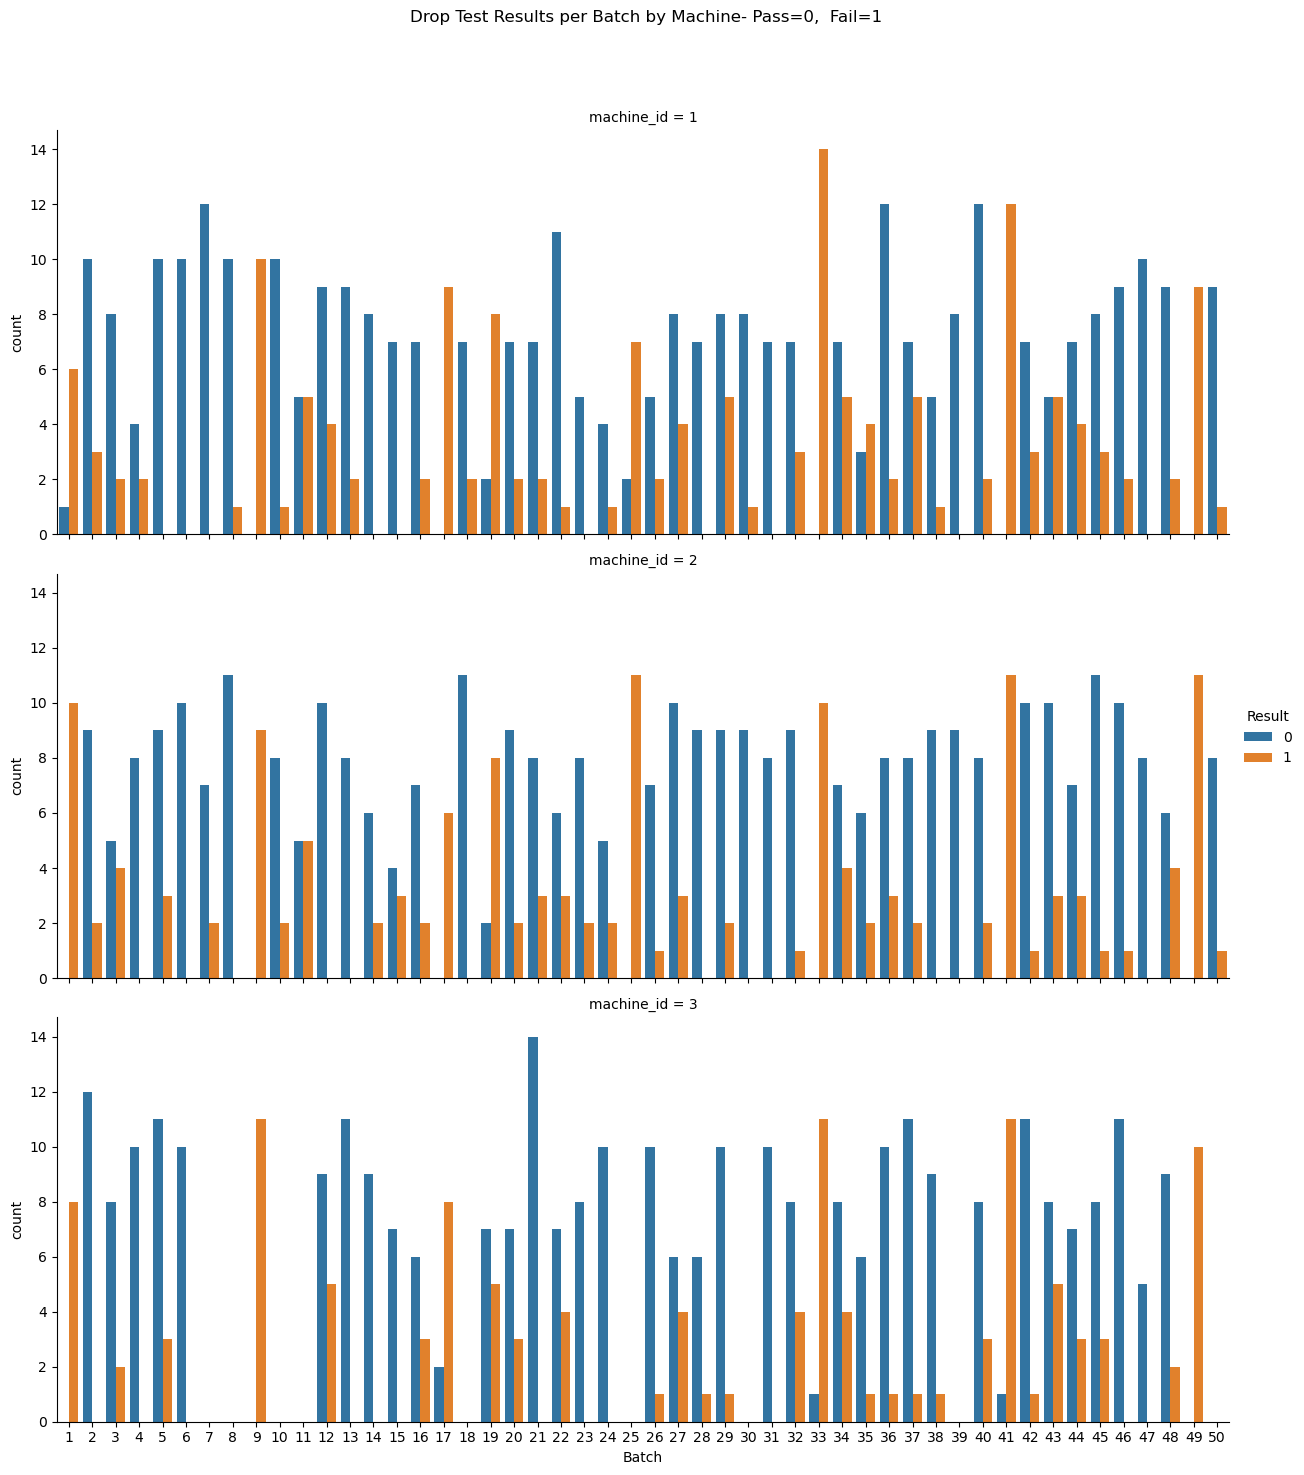

In [ ]:
# number of time each unique value of result occurs per batch for each machine

sns.catplot(data=dfb, x='Batch', hue='Result', col='machine_id', col_wrap=1, kind='count', aspect=2.5)

plt.suptitle('Drop Test Results per Batch by Machine- Pass=0,  Fail=1')
plt.subplots_adjust(top=0.90)
plt.show()

In [ ]:
# This shows us a clearer picture of failures by Batch on each machine. Some batches completely fail like on Machine 3.
# The last Batch 49 fails across all machines.
# The batches pass/fail is overall different across the machines.

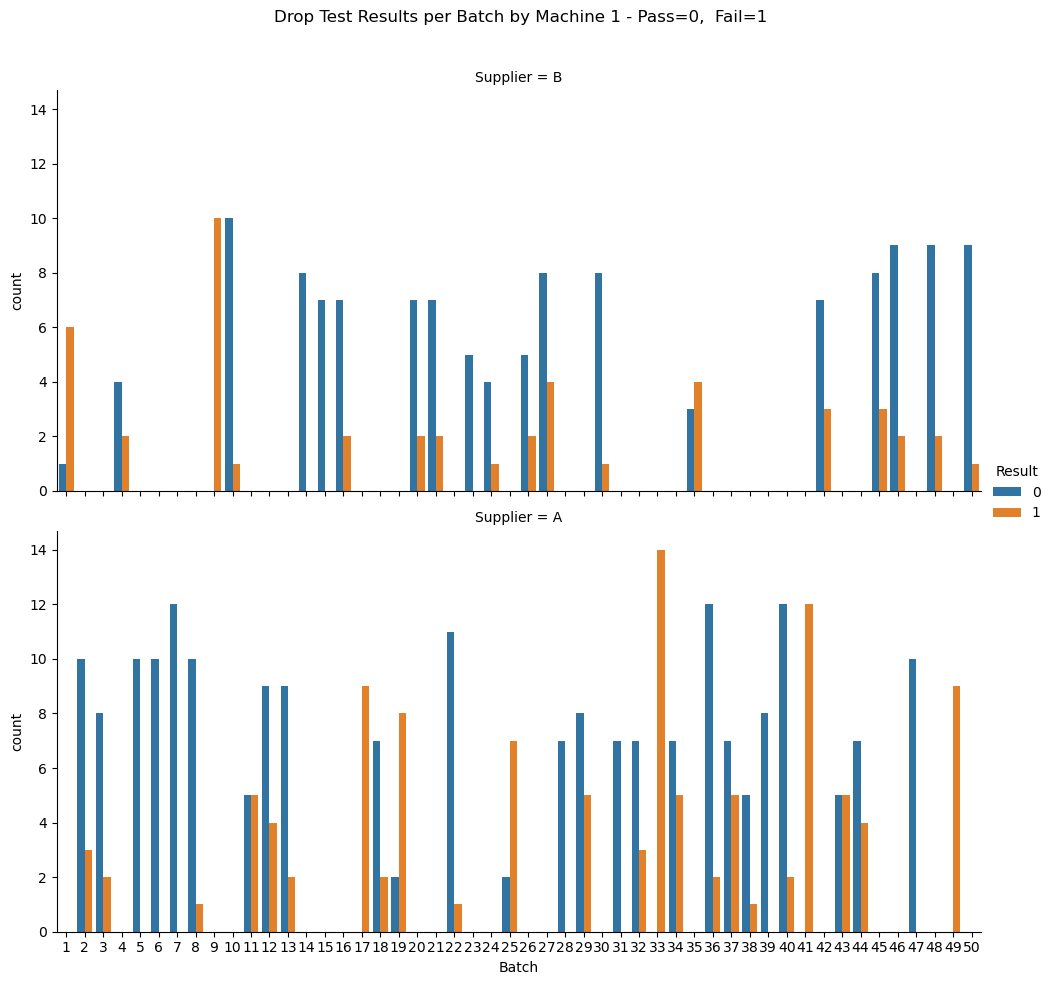

In [ ]:
# number of times result values occurs per batch for each machine and supplier

sns.catplot(data=dfb[dfb.machine_id==1], x='Batch', hue='Result', row='Supplier', kind='count', aspect=2)
plt.suptitle('Drop Test Results per Batch by Machine 1 - Pass=0,  Fail=1')
plt.subplots_adjust(top=0.90)
plt.show()

In [ ]:
# On Machine 1, Supplier A overall has more data than B. So Supplier A has more passes and fail results per Batch.
# Supplier B has much less data, but shows more passes than fails.

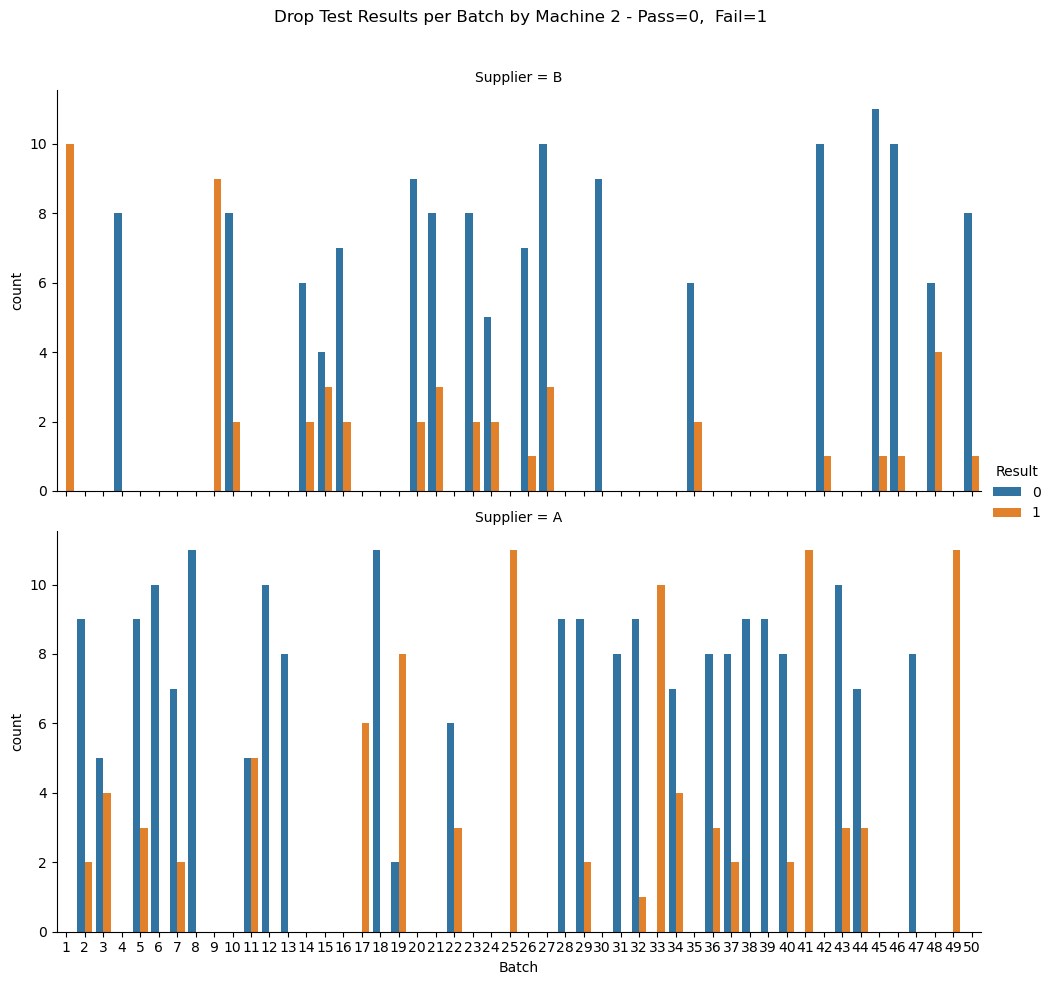

In [ ]:
# number of times result values occurs per batch for each machine and supplier

sns.catplot(data=dfb[dfb.machine_id==2], x='Batch', hue='Result', row='Supplier', kind='count', aspect=2)
plt.suptitle('Drop Test Results per Batch by Machine 2 - Pass=0,  Fail=1')
plt.subplots_adjust(top=0.90)
plt.show()

In [ ]:
# Supplier A has more fail results than Supplier B on Machine 2.

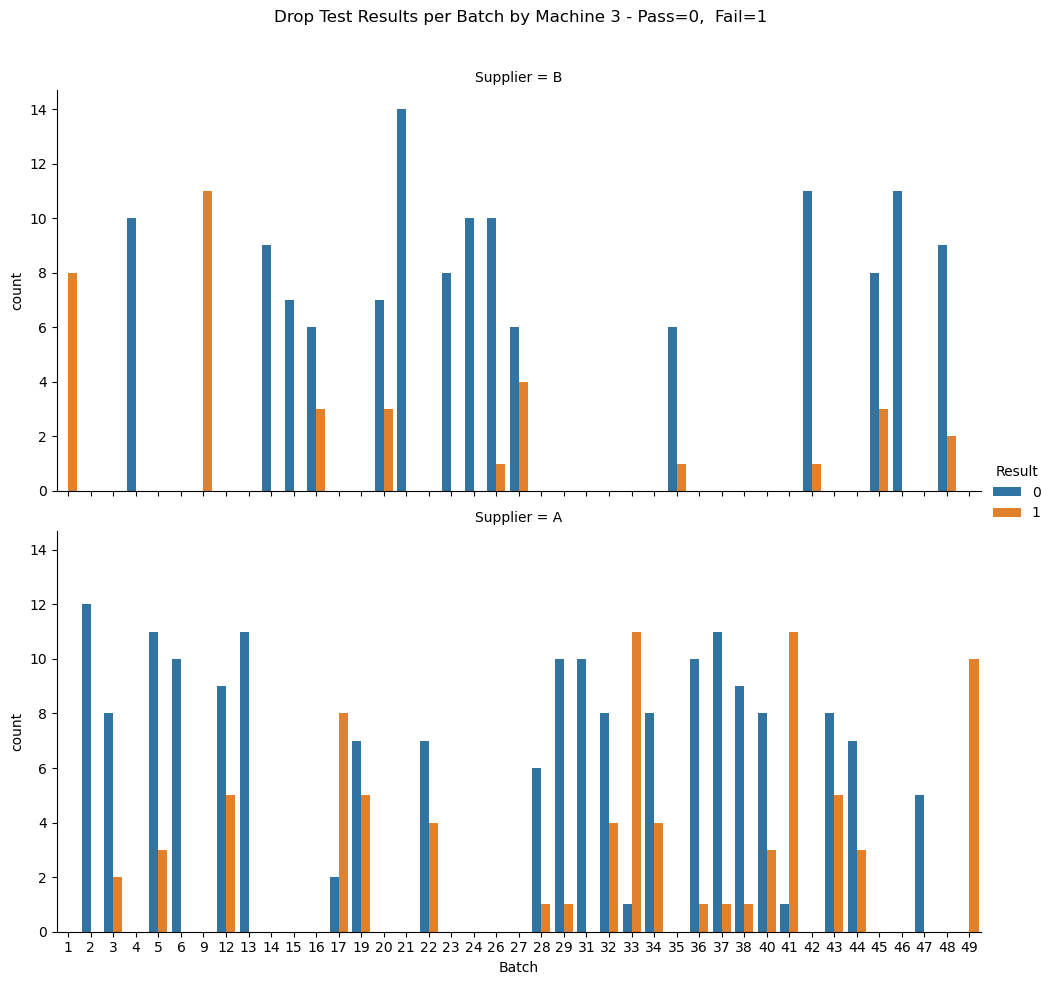

In [ ]:
# number of times result values occurs per batch for each machine and supplier

sns.catplot(data=dfb[dfb.machine_id==3], x='Batch', hue='Result', row='Supplier', kind='count', aspect=2)
plt.suptitle('Drop Test Results per Batch by Machine 3 - Pass=0,  Fail=1')
plt.subplots_adjust(top=0.90)
plt.show()

In [ ]:
# Supplier A has more fail test results than Supplier B, but Supplier A also has more data than B for Machine 3.

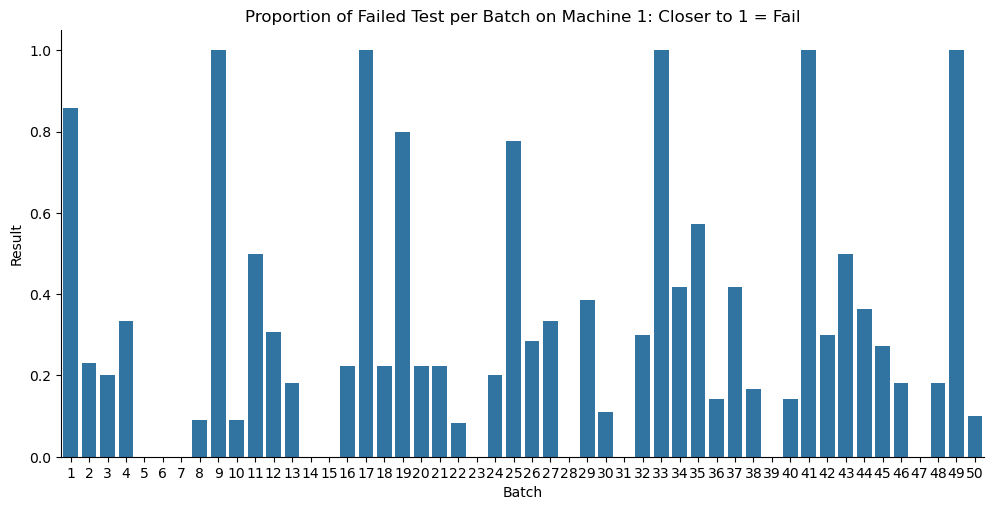

In [ ]:
# proportion of times cell phone case failed the test in each batch by machine

sns.catplot(data=dfb[dfb['machine_id']==1], x='Batch', y='Result', kind='bar', aspect=2, errorbar=None)

plt.title('Proportion of Failed Test per Batch on Machine 1: Closer to 1 = Fail')
plt.show()

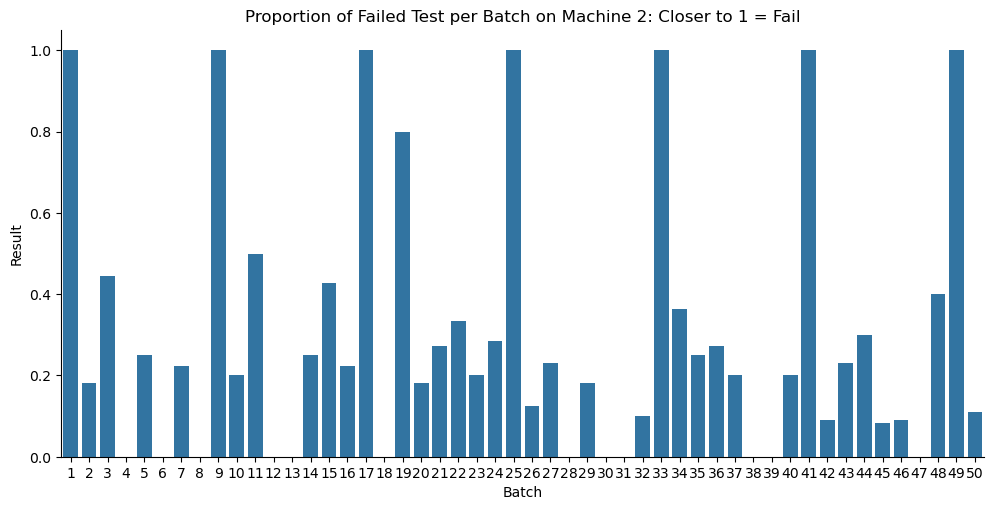

In [ ]:
sns.catplot(data=dfb[dfb['machine_id']==2], x='Batch', y='Result', kind='bar', aspect=2, errorbar=None)

plt.title('Proportion of Failed Test per Batch on Machine 2: Closer to 1 = Fail')
plt.show()

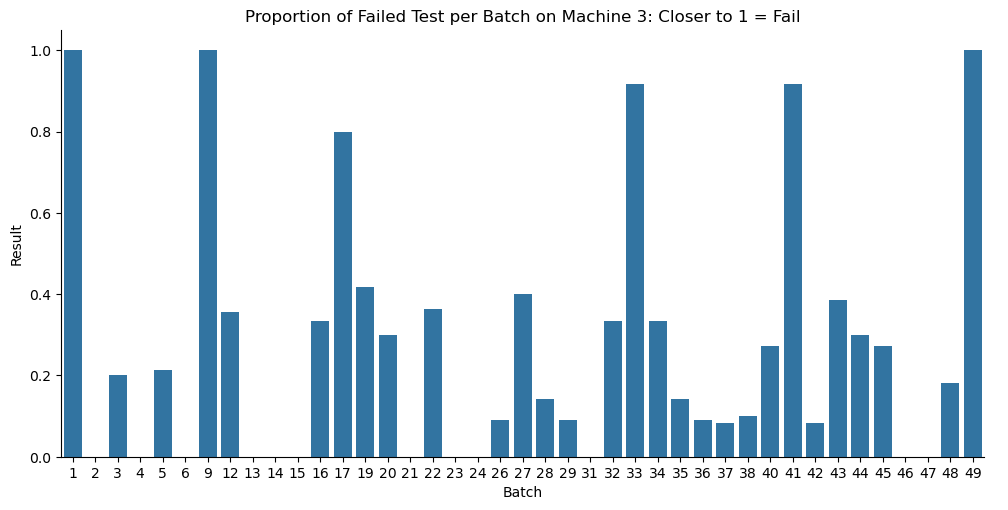

In [ ]:
sns.catplot(data=dfb[dfb['machine_id']==3], x='Batch', y='Result', kind='bar', aspect=2, errorbar=None)

plt.title('Proportion of Failed Test per Batch on Machine 3: Closer to 1 = Fail')
plt.show()

In [ ]:
# These charts show that there are some clear fail batches on all machines, ex: batch 1, 9, 41.
# The higher the bar is for each bach, the higher the fail rate.
# These charts can show which batches need to be addressed on all machines.

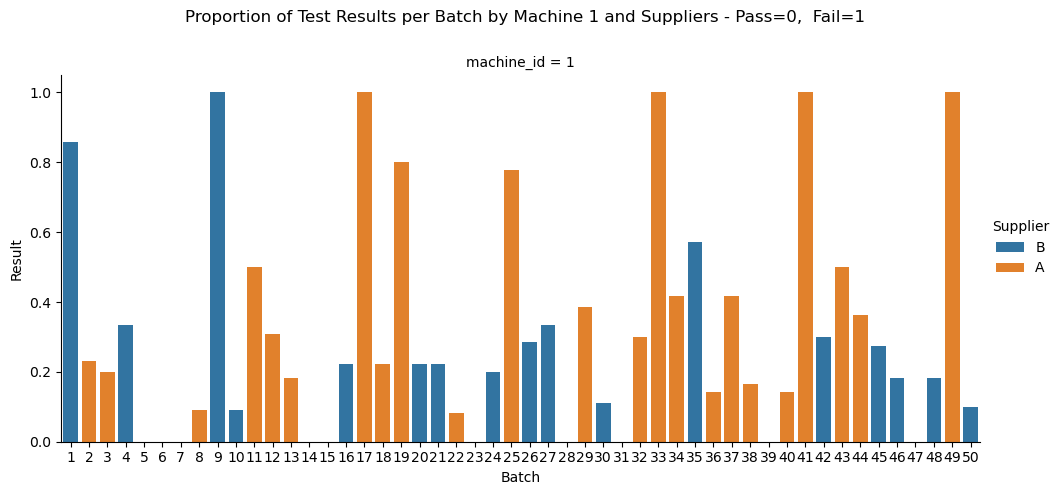

In [ ]:
# proportion of times cell phone case failed test in each batch by machine and supplier

sns.catplot(data=dfb[dfb['machine_id']==1], x='Batch', y='Result', hue='Supplier', row='machine_id', kind='bar', errorbar=None, aspect=2)

plt.suptitle('Proportion of Test Results per Batch by Machine 1 and Suppliers - Pass=0,  Fail=1')
plt.subplots_adjust(top=0.85)
plt.show()

In [ ]:
# The graph shows that Supplier A has more fail rates than Supplier B.

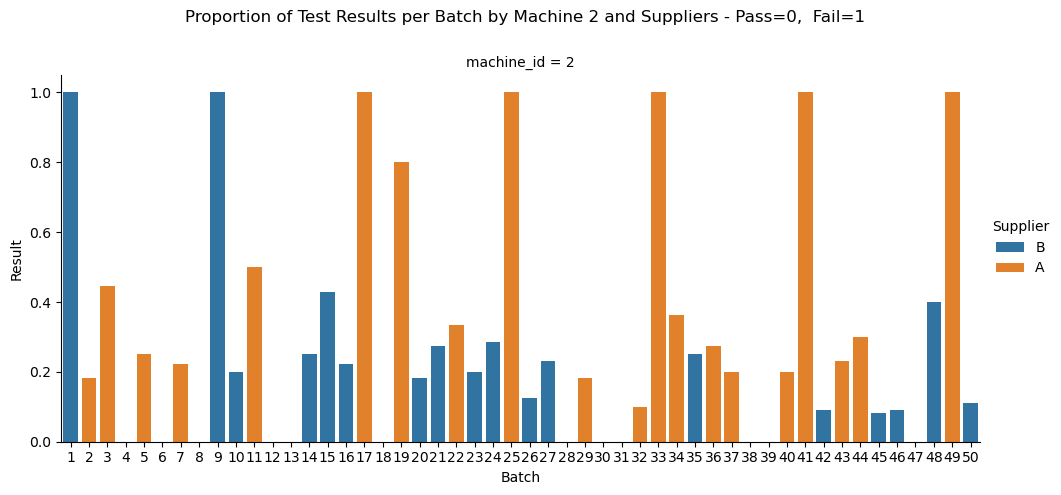

In [ ]:
sns.catplot(data=dfb[dfb['machine_id']==2], x='Batch', y='Result', hue='Supplier', row='machine_id', kind='bar', errorbar=None, aspect=2)

plt.suptitle('Proportion of Test Results per Batch by Machine 2 and Suppliers - Pass=0,  Fail=1')
plt.subplots_adjust(top=0.85)
plt.show()

In [ ]:
# Machine 2 also experiences more fail rates with Supplier A than Supplier B.

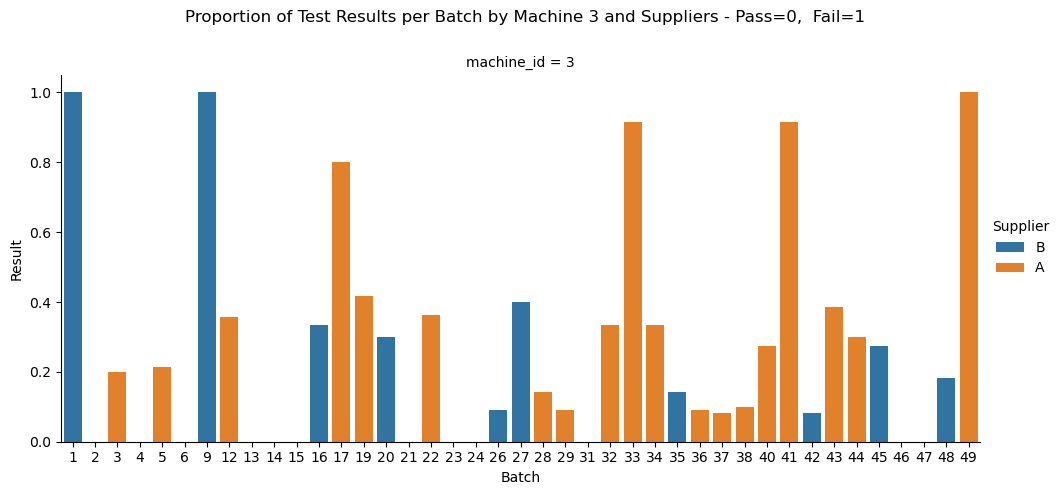

In [ ]:
sns.catplot(data=dfb[dfb['machine_id']==3], x='Batch', y='Result', hue='Supplier', row='machine_id', kind='bar', errorbar=None, aspect=2)

plt.suptitle('Proportion of Test Results per Batch by Machine 3 and Suppliers - Pass=0,  Fail=1')
plt.subplots_adjust(top=0.85)
plt.show()

In [ ]:
# Supplier A has a higher fail rate on Machine 3 again, but there's less Supplier B data overall on Machine 3.

## Problem 05

You must cluster the rows of `dfb` using the 4 operational variables `x1` through `x4`. You must decide how many clusters to use and describe how you made that choice. You may use KMeans OR Hierarchical clustering. Include any figures that helped you make that choice.

Visualize your cluster analysis results by:
* Plotting the number of observations per cluster.
* Visualizing the relationships between the operational variables GIVEN the cluster.

You are interested in the PROPORTION of cell phone cases that failed the DROP TEST. Are any of the clusters associated with higher failure PROPORTIONS than others? Based on your visualizations how would you describe that cluster?

Add as many cells as you see fit to answer this question.

#### SOLUTION

In [ ]:
# The ranges and standard deviations are different, so I will need to scale them

dfb[['x1','x2','x3','x4']].describe()

x1           x2           x3           x4
count  1412.000000  1412.000000  1412.000000  1412.000000
mean     51.927603   101.774263    23.938728    10.598865
std       3.119574    12.696791     2.213578     1.542662
min      45.037786    66.618560    19.358012     7.878106
25%      49.179177    95.974546    22.373659     9.475243
50%      52.559740   104.339595    23.865352    10.309472
75%      54.747404   110.292729    25.293539    11.277942
max      58.647186   125.291430    28.989043    14.558387

In [ ]:
X_vars= StandardScaler().fit_transform(dfb[['x1','x2','x3','x4']])

In [ ]:
X_vars.shape

(1412, 4)

In [ ]:
type(X_vars)

numpy.ndarray

In [ ]:
# Decide number of clusters
tots_within=[]

K= range(1,11)

for k in K:
    km= KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500).fit(X_vars)
    tots_within.append(km.inertia_)

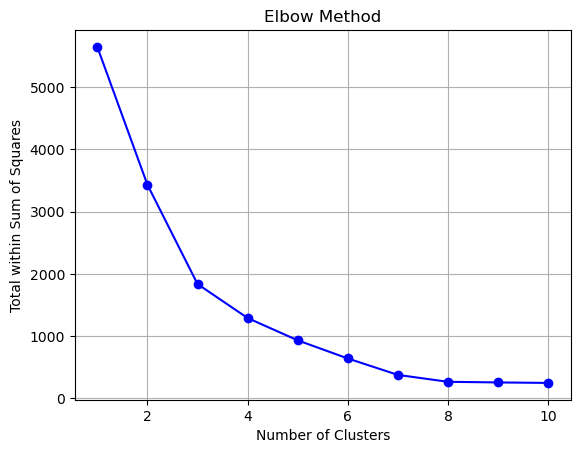

In [ ]:
# Plot the elbow to determine right number of clusters

fig, ax= plt.subplots()

ax.plot(K, tots_within, 'bo-')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Total within Sum of Squares')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [ ]:
# 3 is where the elbow begins to drop off.

In [ ]:
km3= KMeans(n_clusters=3, random_state=121, n_init=25, max_iter=500)

In [ ]:
km3.fit_predict(X_vars)

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
# creating a new column for k3 that stores the results of the KMeans cluster labels

dfb['k3']= pd.Series(km3.fit_predict(X_vars), index=dfb.index)

In [ ]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412 entries, 0 to 1411
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1412 non-null   object 
 1   Batch          1412 non-null   int64  
 2   s_id           1412 non-null   int64  
 3   x1             1412 non-null   float64
 4   x2             1412 non-null   float64
 5   x3             1412 non-null   float64
 6   x4             1412 non-null   float64
 7   machine_id     1412 non-null   int64  
 8   Supplier       1412 non-null   object 
 9   Density        1412 non-null   float64
 10  test_group_id  1412 non-null   object 
 11  Result         1412 non-null   int64  
 12  k3             1412 non-null   int32  
dtypes: float64(5), int32(1), int64(4), object(3)
memory usage: 138.0+ KB


In [ ]:
# changing the k3 column to a category

dfb['k3']=dfb.k3.astype('category')

In [ ]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412 entries, 0 to 1411
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ID             1412 non-null   object  
 1   Batch          1412 non-null   int64   
 2   s_id           1412 non-null   int64   
 3   x1             1412 non-null   float64 
 4   x2             1412 non-null   float64 
 5   x3             1412 non-null   float64 
 6   x4             1412 non-null   float64 
 7   machine_id     1412 non-null   int64   
 8   Supplier       1412 non-null   object  
 9   Density        1412 non-null   float64 
 10  test_group_id  1412 non-null   object  
 11  Result         1412 non-null   int64   
 12  k3             1412 non-null   category
dtypes: category(1), float64(5), int64(4), object(3)
memory usage: 134.0+ KB


In [ ]:
dfb.k3.value_counts()

k3
0    666
1    572
2    174
Name: count, dtype: int64

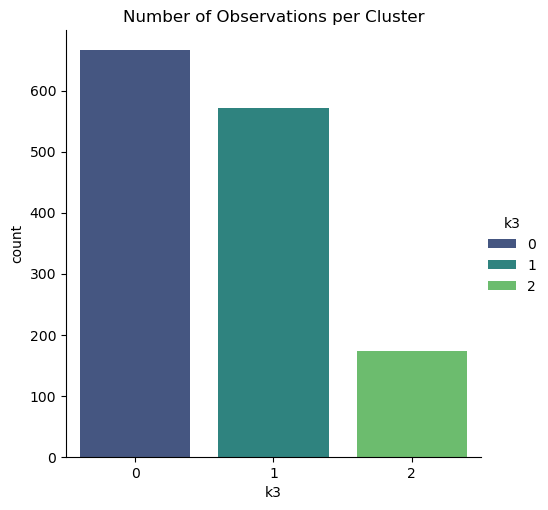

In [ ]:
# plot number of observations per cluster

sns.catplot(data=dfb, x='k3', hue='k3', kind='count', palette='viridis')

plt.title('Number of Observations per Cluster')
plt.show()

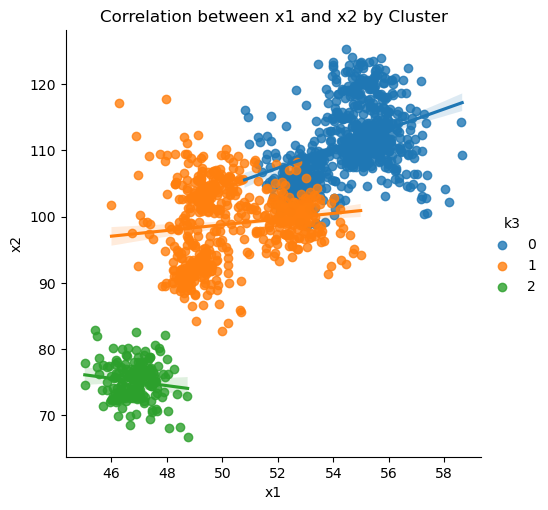

In [ ]:
# Relationships between operational variables by cluster

sns.lmplot(data=dfb, x='x1', y='x2', hue='k3')

plt.title('Correlation between x1 and x2 by Cluster')
plt.show()

In [ ]:
# Cluster 2 is well separated from cluster 0 and 1. The slopes on cluster 1 and 2 are weak, and slightly more correlated on 0.
# Cluster 0 and 1 have some more variability than cluster 2
# Cluster 0 and 1 aren't as strongly separated so they're not AS distinct at cluster 2
# Cluster 0 and 1 are very weakly positively correlated, and cluster 2 is weakly negatively correlated.

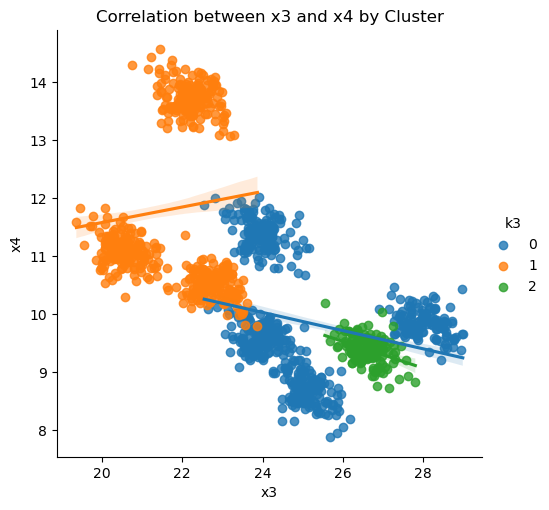

In [ ]:
# Relationships between operational variables by cluster

sns.lmplot(data=dfb, x='x3', y='x4', hue='k3')

plt.title('Correlation between x3 and x4 by Cluster')
plt.show()

In [ ]:
# Cluster 0 and 1 both have different huddles. In this space, it looks like subgroups appear.
# x4 for cluster 1 is high compared to the rest. x3 is low for cluster 1 compared to the other clusters.

# Quickly showing the other variables that had less correlation below:

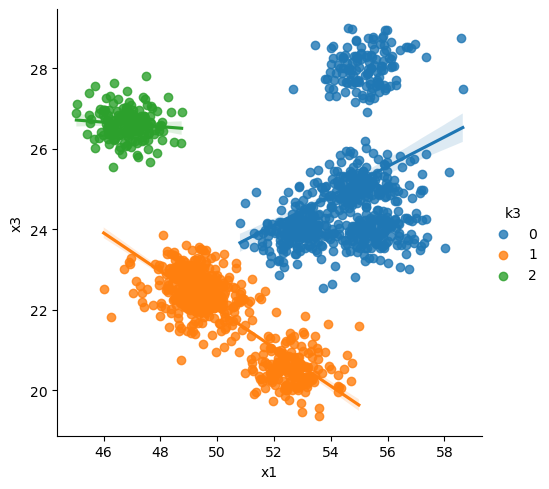

In [ ]:
sns.lmplot(data=dfb, x='x1', y='x3', hue='k3')
plt.show()

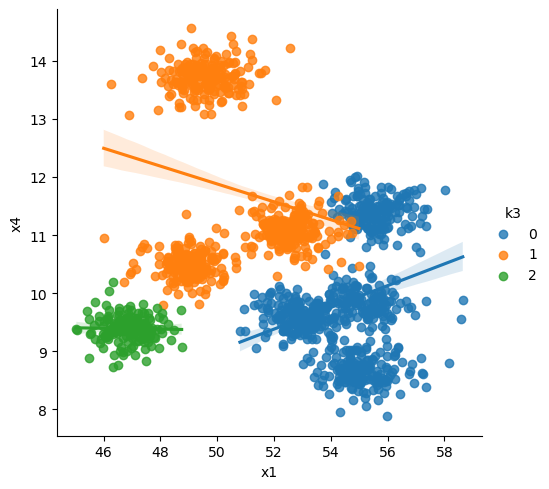

In [ ]:
sns.lmplot(data=dfb, x='x1', y='x4', hue='k3')
plt.show()

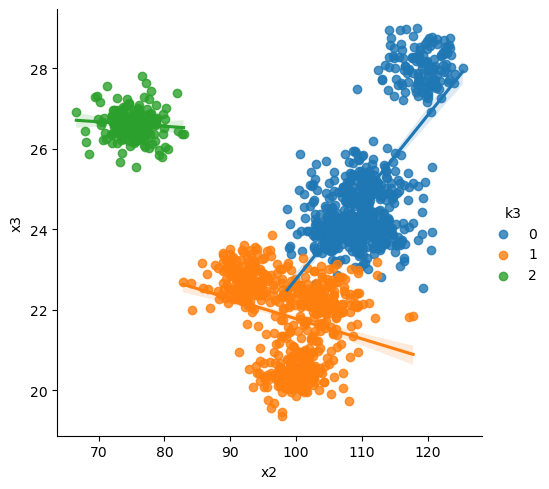

In [ ]:
sns.lmplot(data=dfb, x='x2', y='x3', hue='k3')

plt.show()

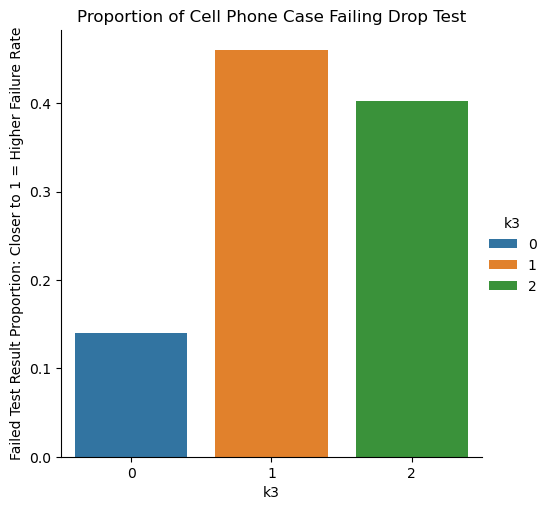

In [ ]:
# proportion of failures per cluster

sns.catplot(data=dfb, x='k3', hue='k3', y='Result', kind='bar', errorbar=None)

plt.title('Proportion of Cell Phone Case Failing Drop Test')
plt.ylabel('Failed Test Result Proportion: Closer to 1 = Higher Failure Rate')
plt.show()

In [ ]:
# Cluster 1 is associated with the highest failure rate, with cluster 2 close behind, but cluster 0 has a very low failure rate!
# Cluster 1 is almost close to half of the cell phone cases failing the drop test!
# When I look at the clusters, it seems cluster 1 has very low x3 compared to the other 2, which means it may need a higher x3.

In [ ]:
# Cluster 0 has the lowest failure rate. I see it has the highest x3, high x2, and low x4.

In [ ]:
# Based on the cluster failure rates, it seems the ideal conditions for a low failure rate is to follow cluster 0's conditions.

In [ ]:
# Formatting
# My markdown cells do not show up when I change the cell to markdown and only when I press save and refresh every time. They dissapear....
# So, unfortunately I can't press save and refresh the page every time I need a markdown cell

In [ ]:
# References
# I used Google's AI response when I looked up some formatting of the charts, like how to move the legend out of the graph,
# and I used it for moving the spacing of the chart title so it wasn't on top of the chart.